# Welcome to the Monthly Unit Test

The work this unit test will entail is as follows:

1. (simple) unified caption maker: given a list of genres and moods, create a unified prompt that can be used to prompt the end model
2. (simple side, implementational): run an instance of flan t5, run the output of task 1 through this to make our first and only input** to the model: EMBEDDED_CAPTION, hereby referred to as EC.

FUCKUP: flan t5 is a whole llm, all i need is sentencetransformers
3. (hardest): create an accurate csv representation*** of a midi track and
find how to refer to this in the next part to reference the right song, can recycle code from achievingmusic but this needs to be an organic fusion that goes hand in hand with the transformations applied in training that model.
4. (hard, ICSE comprehension level): read through task 5 of achievingmusic and find out how exactly to query the trained encoder and what form will the returned latent vector be in. use this information to make our second input to training the end model i.e. ENCODED_ROLL, hereby referred to as ER.
5. (medium) create a pipeline that queries 1 through 4 above to make one entire dataset and stores it. this unit must implement appropriate checkpointing to ensure a lost runtime doesn't waste all my effort.
6. (medium) create a simple transformer that maps EC to ER for each song. use contrastive loss to use the unified caption to our advantage. write both the architecture and the training loop
7. (medium) use 6 with decoder and achievingmusic code to rebuild midi





**: [BONUS: try to output above as either a simple list or maybe an np array / pt tensor that can easily go as input into the main model. prefer a list based format, optimality is not of the essence today]


***: [This step involves the choice to do one of two things: (a) repeat the structure of achievingmusic where all the tracks are put into a single csv, this makes it more time efficient but it makes song tracking significantly harder (b) convert each midi into a standalone csv file.this makes input slightly complicated but resolves all other issues. this method may take longer monolithic slabs of work but saves time by not having to work on files that may not be used in our final training process.]

## Recommended Learning for the UNITS (dynamic list, will be updated as work progresses):

1. none
2. flan t5's page on huggingface for implementing, check its output format to hit the bonus task in the head, if bonus fails, last two tasks become much harder.
IF t5 fails to deliver, explore sentencetransformers.
3. the way to represent csv's referenced in the git that inspired achievingmusic.
4. my rotten plagiarised code
5. check out some shallow details about pickling
6. /insert embarassing thing here/ + the exact way to query things that clip etc utilise to maybe change the format of unit 1 here.

# Dependencies:

try to insert all dependencies here to make a list of all the stuff that is needed. Not mandatory in the least bit.

In [ ]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

# UNIT 1:

STATUS: done, w/o full sentences


usage: UC=getUC(genres,moods)

Current format for the prompt:

`Create a (genre1),(genre2) song which is (mood1),(mood2),(mood3),(mood4),(mood5)`

In [ ]:
def getUC(genres, moods):
  '''
  manage commas later, i dont think t5 will care too much about those extra commas
  '''
  strbase="Create a "
  for genre in genres:
    strbase+=genre+", "
  strbase+="song which is "
  for mood in moods:
    strbase+=mood+", "
  strbase+="."
  return strbase

In [ ]:
genres=["hip hop", "trap"]
moods = ["vibey", "smooth", "brazy", "entertaining"]
print(getUC(genres,moods))

Create a hip hop, trap, song which is vibey, smooth, brazy, entertaining, .


# UNIT 2:
STATUS: done, primitive but most probably sufficient. see if model within sentencetransformers needs changing

usage: EC=getEC(UC)


In [ ]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from sentence_transformers import SentenceTransformer
ECmodel = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def getEC(UC):
  return ECmodel.encode(UC).flatten()

In [ ]:
genres=["hip hop", "trap"]
moods = ["vibey", "smooth", "brazy", "entertaining"]
UC=getUC(genres,moods)
EC=getEC(UC)
print(EC)
print(EC.shape)

[-3.36014330e-02 -8.32740515e-02  5.07646874e-02  7.67512154e-03
 -6.07800409e-02 -1.76318400e-02  6.21515475e-02 -4.70493138e-02
  2.71883234e-03  2.39062347e-02 -1.56560615e-02 -1.37989651e-02
  1.37631013e-03 -1.06125638e-01  5.20273522e-02 -2.25458629e-02
  6.61211759e-02  6.90652132e-02  3.70696411e-02 -7.56099075e-02
 -2.70141382e-02 -3.36696543e-02  2.52554659e-02  4.09713760e-02
 -1.09460741e-01  3.92787345e-02  5.94330393e-03  4.77609038e-02
  7.30478987e-02 -5.32829463e-02  5.56401648e-02  1.23363890e-01
  4.73338831e-03 -3.01883649e-02 -7.32093379e-02  2.14305371e-02
  3.63718299e-03  5.48932552e-02  1.38145518e-02 -1.70515999e-02
  3.84305753e-02  4.52134311e-02 -9.01074149e-03  3.59255970e-02
 -3.04486603e-02 -6.46442920e-02 -3.78163233e-02 -2.43567359e-02
  1.38136214e-02  2.74025090e-02 -1.21857226e-02 -7.38407969e-02
 -3.38884853e-02  3.09894793e-02 -5.22767864e-02 -1.07108906e-01
 -9.19092000e-02  1.76486019e-02  4.04831208e-02 -4.27722223e-02
 -6.38040015e-03 -5.89856

# UNIT 3:

STATUS: done.

have ignored the need to discard some files, i think prompting will work just fine anyway

MODIFICATION: returns df instead of csv. appropriately change if and when needed

usage==> df=makeDF(get_single_instrument("path/to/midi"))

let us make some assumptions and then slowly remove them as needed:

1. input to the function we make in unit 3 will always be only a single midi file and the end model can use this
2. we know which midi files to take and which to discard
3. (idk wtf i will do about instruments here)





In [ ]:
!pip install pretty-midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.3 MB/s eta 0:00:00
  Created wheel for pretty-midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592286 sha256=72e76a8858005782d835c0ae5e78463853191f32222b1dff44d29681ef8f711c
  Stored in directory: /root/.cache/pip/wheels/e6/95/ac/15ceaeb2823b04d8e638fd1495357adb8d26c00ccac9d7782e
Successfully built pretty-midi


In [ ]:
import glob
import os
import pandas as pd
import numpy as np
import librosa.display as display
import matplotlib.pyplot as plt
%matplotlib inline

import pretty_midi as pm

for the instrument problem, gpt suggested giving an instrument score based on which non drum instrument has the highest note density. using that for now

In [ ]:
def get_single_instrument(midi_file_path, output_midi_path="out.mid"):
  midi_data=pm.PrettyMIDI(midi_file_path)
  duration=midi_data.get_end_time()
  if duration == 0:
     return None
  instruments=midi_data.instruments
  if not instruments: return None
  instrument_scores={}
  for instrument in instruments:
    if instrument.is_drum:
      continue
    notes=instrument.notes
    if len(notes) == 0:
      continue
    note_count=len(notes)


    avg_velocity=np.mean([note.velocity for note in notes])
    '''
    now we shall define NDS, which is our note density score
    currently this is our way of determining which instrument is most likely to be the melody|
    since instruments with higher velocity and spread across the track tend to be the melody of the song|
    current implementation beingle single instrumental, this is how we prompt. this will prove|
    to be wrong if melodies happen to not decide the grenre, i want to stay ignorant for now
    '''

    NDS= (note_count/duration)*avg_velocity

    pitches=[note.pitch for note in notes]
    median_pitch=np.median(pitches) if pitches else 0

    if median_pitch<48:
      continue #instrument is likely bass, this step aligns with og code for achievingmusic

    # if we reach here, this instrument gets counted
    instrument_scores[instrument]=NDS


  melody_instrument=max(instrument_scores, key=instrument_scores.get, default=None)

  if not melody_instrument:
    print("Unable to find a melody for this track, skipping.")
    return None

  new_midi = pm.PrettyMIDI()
  extracted_instrument = pm.Instrument(program=melody_instrument.program)
  extracted_instrument.notes = melody_instrument.notes
  new_midi.instruments.append(extracted_instrument)

  if output_midi_path:
    new_midi.write(output_midi_path)
    print(f"New midi with {melody_instrument.name} written to {output_midi_path}")
  return new_midi


In [ ]:
get_single_instrument("/content/potc.mid")

New midi with Right Hand written to out.mid


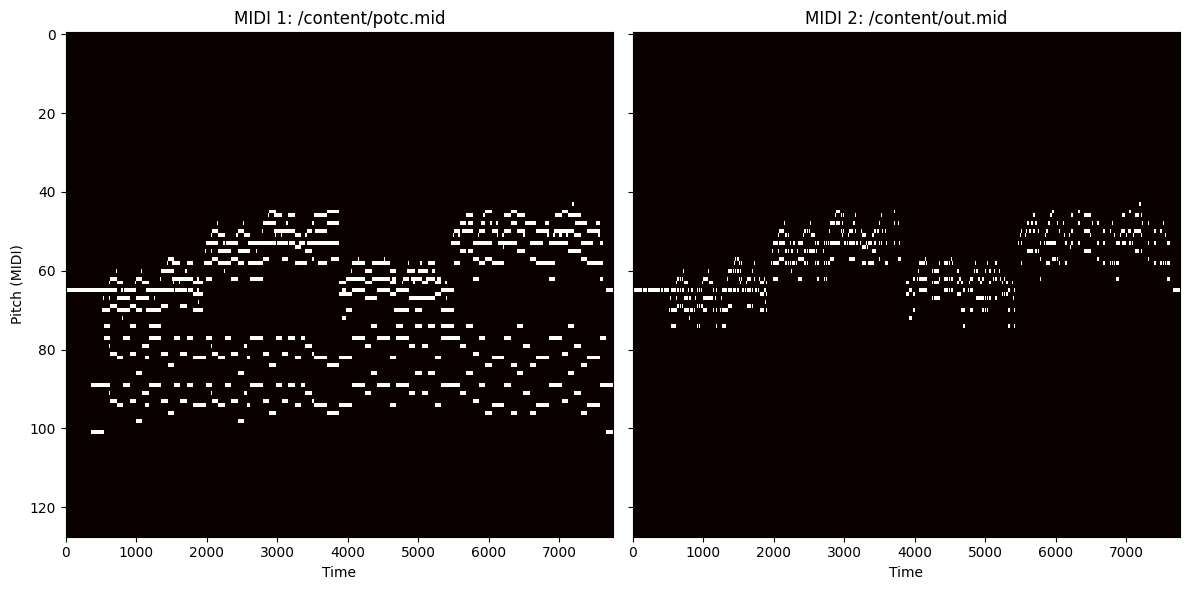

In [ ]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt

pre_midi = "/content/potc.mid"
post_midi = "/content/out.mid"
midi1 = pretty_midi.PrettyMIDI(pre_midi)
midi2 = pretty_midi.PrettyMIDI(post_midi)
piano_roll1 = sum([inst.get_piano_roll(fs=100) for inst in midi1.instruments if not inst.is_drum])
piano_roll2 = sum([inst.get_piano_roll(fs=100) for inst in midi2.instruments if not inst.is_drum])
piano_roll1 = np.log1p(piano_roll1)
piano_roll2 = np.log1p(piano_roll2)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes[0].imshow(piano_roll1[::-1], aspect='auto', cmap='hot', interpolation='nearest')
axes[0].set_title("MIDI 1: " + pre_midi)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Pitch (MIDI)")
axes[1].imshow(piano_roll2[::-1], aspect='auto', cmap='hot', interpolation='nearest')
axes[1].set_title("MIDI 2: " + post_midi)
axes[1].set_xlabel("Time")
plt.tight_layout()
plt.show()

side note: i played out.mid at this point. this function works perfectly the melody is to die for!!!!??!!!!!!!!!

i may want to train the first model again on gems like this

to the person reading this: he's a pirate by hans zimmer is the best pirate soundtrack ever and noone can tell me otherwise


In [ ]:
import music21

In [ ]:
def makeDF(midi):
  note_columns = [pretty_midi.note_number_to_name(n) for n in range(0,128)]
  def encode_dummies(instrument, sampling_freq):
    """ Gonna cheat a little bit by transposing the instrument piano roll.
        However, that leaves us with a lot of blank space.
        Coercing to type uint8, since the max velocity is 127, and there are also only 128 notes. uint8 goes to 255.
        Saves memory
    """
    pr = instrument.get_piano_roll(fs=sampling_freq).astype('uint8').T
    print("Shape of piano roll: {}".format(pr.shape))
    return pd.DataFrame(pr, columns=note_columns)
  def trim_blanks(df):
    """
        Remove the first period of no activity (fast forward to where the first note begins for this instrument)
    """
    nonzero = df.apply(lambda s: s != 0)
    nonzeroes = df[nonzero].apply(pd.Series.first_valid_index)
    first_nonzero = nonzeroes.min()
    if first_nonzero is np.nan:
        return None
    return df.iloc[int(first_nonzero):]

  """
      Create a pandas to store the piano rolls in.
      It'll look a bit like this:

      |   Index     | t | C0 |...| C10 |
      |Song_name_3:0| 0 | 40 |...| 0   |
      |             | 1 | 40 |...| 0   |
      |             |...|... |...| ... |
      |             | N | 40 |...| 0   |
      |Song_name_3:1| 0 | 40 |...| 0   |
      |             |...|... |...| ... |
      |             | N | 40 |...| 0   |
      |Song_name_4:0| 0 | 40 |...| 0   |
      |             |...|... |...| ... |
      |             | N | 40 |...| 0   |

  """
  saved_columns = [pretty_midi.note_number_to_name(n) for n in range(48,108)]
  piano_rolls = pd.DataFrame(columns=['piano_roll_name', 'timestep'] + saved_columns)
  piano_rolls = piano_rolls.set_index(['piano_roll_name', 'timestep'])
  def chopster(dframe):
    # Figure out range of frame (0-128)
    df_max = dframe.max(axis = 0)

    #MODIFCATION(from og chopster): changed from 108 to 109 to hope to fix the dimension error
    dframe.drop(labels=[pretty_midi.note_number_to_name(n) for n in range(108,128)], axis=1, inplace=True)
    dframe.drop(labels=[pretty_midi.note_number_to_name(n) for n in range(0,48)], axis=1, inplace=True)
    return dframe
  # Non-zero values changed to 1's
  def minister(dframe):
    return dframe.where(dframe<1, 1)
  def arpster(dframe):
    # Count amount of notes being played at once.
    note_amount = np.asarray(dframe.astype(bool).sum(axis=1))
    i = 0

    # Slide through whole MIDI
    while i < dframe.shape[0]:
        # Check if note is single
        if note_amount[i] == 1:
            i += 1
            continue
        elif note_amount[i] > 1:
            hits = 0
            hit_index = []
            # Calculates the amount of notes being played
            for j in range(dframe.shape[1]):
                if dframe.iloc[i,j] == 1:
                    hit_index.append(j)
                    hits += 1
                    if hits == note_amount[i]:
                        break

            length = 0

            # Removes all notes such that chords are turned into arpeggios.
            # Ensures that all values in hit_index are the same as ones in
            # dframe row.
            while False not in (dframe.iloc[i+length, hit_index] == 1).values:
                for k in range(len(hit_index)):
                    if k != (length % hits):
                        dframe.iloc[i+length, hit_index[k]] = 0
                length += 1
                if len(note_amount) <= i+length or note_amount[i+length-1] != note_amount[i+length]:
                    break

            # Skip ahead to next note
            i += length

        # Maybe a case where we count ithe amount of silent steps going ahead
        elif note_amount[i] == 0:
            i += 1
            continue

    return dframe

  # Chops up into desired window size.
# and maybe saves them to csv in this step?
# frame_size: amount of measures pr input
  def cutster(dframe, frame_size, undesired_silence):
    # Chop up if the window size fits the music

    # Check if frame size is greater than MIDI length
    # Pad with zeros
    if frame_size > dframe.shape[0]/16:
        return dframe

    note_amount = np.asarray(dframe.astype(bool).sum(axis=1))
    zero_amount = 0

    df_dictionary = {}
    dict_index = 0

    divider = 0
    i = 0
    while i < len(note_amount):
        # Cuts out silent measures if greater than undesired_silence
        if zero_amount/16 > undesired_silence and note_amount[i] != 0:
            drop_amount = [j for j in range(i-zero_amount,i)]
            dframe.drop(drop_amount, inplace=True)
            note_amount = np.delete(note_amount, drop_amount)
            i -= zero_amount-1
            zero_amount = 0

        elif note_amount[i] != 0:
            if zero_amount != 0:
                zero_amount = 0
            i += 1
        # Count sequential zeros
        elif note_amount[i] == 0:
            zero_amount += 1
            i += 1

    return dframe
  # Add desired amount of padding to
  # all MIDI files such that they contain
  # the same amount of dimensions.
  def padster(dframe):
      # Find MIDI piece with most keys used
      # Pad all others such they fit the dimensions
      return dframe.fillna(0)
  def transposer(midi_obj):
    midi_file="temp.mid"
    midi_obj.write(midi_file)
    midi_array = midi_file.split('/')

    # converting everything into the key of C major or A minor
    # Major conversion
    majors = dict([("A-", 4),("G#", 4),("A", 3),("A#", 2),("B-", 2),("B", 1),("C", 0),("C#", -1),("D-", -1),("D", -2),("D#", -3),("E-", -3),("E", -4),("F", -5),("F#", 6),("G-", 6),("G", 5)])
    # Minor conversion
    minors = dict([("G#", 1), ("A-", 1),("A", 0),("A#", -1),("B-", -1),("B", -2),("C", -3),("C#", -4),("D-", -4),("D", -5),("D#", 6),("E-", 6),("E", 5),("F", 4),("F#", 3),("G-", 3),("G", 2)])

    score = music21.converter.parse(midi_file)
    key = score.analyze('key')
    if key.mode == "major":
        halfSteps = majors[key.tonic.name]

    elif key.mode == "minor":
        halfSteps = minors[key.tonic.name]

    return halfSteps

  def process_midi(pm):
    try:
        if not isinstance(pm, pretty_midi.PrettyMIDI):
            raise TypeError("Input must be a pretty_midi.PrettyMIDI object")

        semi_shift = transposer(pm)
        print("Loaded into memory, processing...")

        beats = pm.get_beats()
        if len(beats) < 2:
            raise ValueError("Not enough beat information in MIDI file")

        sampling_freq = 1 / (beats[1] / 4)
    except Exception as e:
        print("Ignoring MIDI file: {}".format(e))
        return None

    if len(pm.instruments) == 0:
        print("No instruments found in MIDI file")
        return None

    instrument = pm.instruments[0]  # Assume single instrument in the track
    for note in instrument.notes:
        note.pitch += semi_shift

    try:
        df = encode_dummies(instrument, sampling_freq).fillna(value=0)
    except Exception as e:
        print("Encountered exception for instrument processing: {}".format(e))
        return None

    df = chopster(df)
    df = trim_blanks(df)
    if df is None or df.empty:
        return None

    df = minister(df)
    df = arpster(df)

    if np.amax(np.asarray(df.astype(bool).sum(axis=1))) > 1:
        return None

    df.reset_index(inplace=True, drop=True)
    df['timestep'] = df.index
    df['piano_roll_name'] = "processed_midi"
    df = df.set_index(['piano_roll_name', 'timestep'])

    return df

  return process_midi(midi)

In [ ]:
df=makeDF(get_single_instrument("potc.mid"))
print(df)

New midi with Right Hand written to out.mid
Loaded into memory, processing...
Shape of piano roll: (621, 128)
                          C3  C#3  D3  D#3  E3  F3  F#3  G3  G#3  A3  ...  D7  \
piano_roll_name timestep                                              ...       
processed_midi  0          0    0   0    0   0   0    0   0    0   1  ...   0   
                1          0    0   0    0   0   0    0   0    0   1  ...   0   
                2          0    0   0    0   0   0    0   0    0   1  ...   0   
                3          0    0   0    0   0   0    0   0    0   1  ...   0   
                4          0    0   0    0   0   0    0   0    0   1  ...   0   
...                       ..  ...  ..  ...  ..  ..  ...  ..  ...  ..  ...  ..   
                616        0    0   0    0   0   0    0   0    0   1  ...   0   
                617        0    0   0    0   0   0    0   0    0   1  ...   0   
                618        0    0   0    0   0   0    0   0    0   1  ...   0   

In [ ]:
df.to_csv("test.csv")

# Note for resolving later:
i modified chopster in unit 3 to match the '61' dimensions in unit 4, however what is actually done in achievingmusic is to add an extra pitch to deal with silences, see how to implement this after all 6 units are done. Not doing so will lead to melodies going astray


UPDATE: added an extra empty space types while calling the model, may or may not be better than just including an extra chord. ideally this extra space should be added if none of 48 to 107 is played here. hopefully model will learn to just ignore this one.

# UNIT 4:

STATUS: done, hopefully for good

led to MODIFICATION in unit 3 where i had to change the chopster, see later if the notes in this file properly match what they should be as per achievingmusic

usage==> z=getER(df)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
from torch.nn.functional import softplus

In [ ]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


NOTESPERBAR=16 #total notes in one bar

totalbars=16 #total bars as input
NUM_PITCHES=60+1 # all possible notes to play +1 for silences

TOTAL_NOTES=NOTESPERBAR*totalbars

num_features=NUM_PITCHES #size of input feature vector

batch_size = 16 #actual batchsize

TEACHER_FORCING=True #not used but it will be needed

In [ ]:
#Define size variables
input_size = NUM_PITCHES

enc_hidden_size = 512  # Increased from 256
conductor_hidden_size = 512  # Increased from 256

decoders_hidden_size = 128  # Increased from 64
decoders_initial_size = 64  # Increased from 32

n_layers_conductor = 2  # Now being used
n_layers_decoder = 3  # Now being used

latent_features = 128  # Increased from 64

sequence_length = 16  # Notes per decoder

dropout_rate = 0.1  # Decreased from 0.2

In [ ]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_features, teacher_forcing, eps_i):
        super(VariationalAutoencoder, self).__init__()

        self.teacher_forcing = teacher_forcing
        self.eps_i = eps_i

        self.latent_features = latent_features

        # Data goes into bidirectional encoder
        self.encoder = torch.nn.LSTM(
            batch_first=True,
            input_size=input_size,
            hidden_size=enc_hidden_size,
            num_layers=2,  # Increased from 1
            bidirectional=True
        )

        # Encoded data goes onto connect linear layer. Inputs must be *2 because LSTM is bidirectional
        # Output must be 2*latent space because it needs to be split into mu and sigma right after.
        self.encoderOut = nn.Linear(in_features=enc_hidden_size*2, out_features=latent_features*2)

        # After being converted data goes through a fully connected layer
        self.linear_z = nn.Linear(in_features=latent_features, out_features=decoders_initial_size)

        self.dropout = nn.Dropout(p=dropout_rate)

        # Define the conductor and note decoder
        self.conductor = nn.LSTM(decoders_initial_size, decoders_initial_size, num_layers=n_layers_conductor, batch_first=True)
        self.decoder = nn.LSTM(NUM_PITCHES+decoders_initial_size, decoders_hidden_size, num_layers=n_layers_decoder, batch_first=True)

        # Linear note to note type (classes/pitches)
        self.linear = nn.Linear(decoders_hidden_size, NUM_PITCHES)

    # Used to initialize the hidden layer of the encoder to zero before every batch
    def init_hidden(self, batch_size):
        # Must be 4 x batch x hidden_size because it's a bi-directional LSTM with 2 layers
        init = torch.zeros(4, batch_size, enc_hidden_size, device=device)
        c0 = torch.zeros(4, batch_size, enc_hidden_size, device=device)

        # For the conductor LSTM
        init_conductor = torch.zeros(n_layers_conductor, batch_size, decoders_initial_size, device=device)
        c_conductor = torch.zeros(n_layers_conductor, batch_size, decoders_initial_size, device=device)

        return init, c0, init_conductor, c_conductor

    def set_scheduled_sampling(self, eps_i):
        self.eps_i = eps_i

    def use_teacher_forcing(self):
      with torch.no_grad():
          tf = np.random.rand(1)[0] <= self.eps_i
      return tf

    def forward(self, x):
        batch_size = x.size(0)

        note = torch.zeros(batch_size, 1, NUM_PITCHES, device=device)

        the_input = torch.cat([note, x], dim=1)

        outputs = {}

        # Creates hidden layer values
        h0, c0, hconductor, cconductor = self.init_hidden(batch_size)

        x = self.dropout(x)  # Apply dropout

        # Resets encoder at the beginning of every batch and gives it x
        x, hidden = self.encoder(x, (h0, c0))

        # x = self.dropout(x)

        # Goes from 4096 to 1024
        x = self.encoderOut(x)

        # x = self.dropout(x)

        # Split encoder outputs into a mean and variance vector
        mu, log_var = torch.chunk(x, 2, dim=-1)

        # Make sure that the log variance is positive
        log_var = softplus(log_var)

        # :- Reparametrisation trick
        # A sample from N(mu, sigma) is mu + sigma * epsilon
        # Where epsilon ~ N(0, 1)

        # Don't propagate gradients through randomness
        with torch.no_grad():
            batch_size = mu.size(0)
            epsilon = torch.randn(batch_size, 1, self.latent_features)

            if cuda:
                epsilon = epsilon.cuda()

        # Setting sigma
        sigma = torch.exp(log_var * 0.5)  # Corrected exponent

        # Generate z - latent space
        z = mu + epsilon * sigma

        # Decrease space
        z = self.linear_z(z)

        # z = self.dropout(z)

        # Make dimensions fit (NOT SURE IF THIS IS ENTIRELY CORRECT)
        # z = z.permute(1, 0, 2)

        # DECODER ##############

        conductor_hidden = (hconductor, cconductor)

        counter = 0

        notes = torch.zeros(batch_size, TOTAL_NOTES, NUM_PITCHES, device=device)

        # For the first timestep the note is the embedding
        note = torch.zeros(batch_size, 1, NUM_PITCHES, device=device)

        # Go through each element in the latent sequence
        for i in range(16):
            embedding, conductor_hidden = self.conductor(z[:, i, :].view(batch_size, 1, -1), conductor_hidden)

            if self.use_teacher_forcing():
                # Reset the decoder state of each 16 bar sequence
                decoder_hidden = (torch.randn(n_layers_decoder, batch_size, decoders_hidden_size, device=device),
                                  torch.randn(n_layers_decoder, batch_size, decoders_hidden_size, device=device))

                embedding = embedding.expand(batch_size, NOTESPERBAR, embedding.shape[2])

                e = torch.cat([embedding, the_input[:, range(i * 16, i * 16 + 16), :]], dim=-1)

                notes2, decoder_hidden = self.decoder(e, decoder_hidden)

                aux = self.linear(notes2)
                aux = torch.softmax(aux, dim=2);

                # Generates 16 notes per batch at a time
                notes[:, range(i * 16, i * 16 + 16), :] = aux;
            else:
                # Reset the decoder state of each 16 bar sequence
                decoder_hidden = (torch.randn(n_layers_decoder, batch_size, decoders_hidden_size, device=device),
                                  torch.randn(n_layers_decoder, batch_size, decoders_hidden_size, device=device))

                for _ in range(sequence_length):
                    # Concat embedding with previous note

                    e = torch.cat([embedding, note], dim=-1)
                    e = e.view(batch_size, 1, -1)

                    # Generate a single note (for each batch)
                    note, decoder_hidden = self.decoder(e, decoder_hidden)

                    aux = self.linear(note)
                    aux = torch.softmax(aux, dim=2);

                    notes[:, counter, :] = aux.squeeze();

                    note = aux

                    counter = counter + 1

        outputs["x_hat"] = notes
        outputs["z"] = z
        outputs["mu"] = mu
        outputs["log_var"] = log_var

        return outputs


net = VariationalAutoencoder(latent_features, TEACHER_FORCING, eps_i=1)

# Transfer model to GPU if available
if cuda:
    net = net.cuda()

print(net)


VariationalAutoencoder(
  (encoder): LSTM(61, 512, num_layers=2, batch_first=True, bidirectional=True)
  (encoderOut): Linear(in_features=1024, out_features=256, bias=True)
  (linear_z): Linear(in_features=128, out_features=64, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (conductor): LSTM(64, 64, num_layers=2, batch_first=True)
  (decoder): LSTM(125, 128, num_layers=3, batch_first=True)
  (linear): Linear(in_features=128, out_features=61, bias=True)
)


In [ ]:
model_path='/content/drive/MyDrive/musicmaking/latestmusic.pth'
checkpoint = torch.load(model_path, map_location=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'), weights_only=False)
net.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [ ]:
print(df)

                          C3  C#3  D3  D#3  E3  F3  F#3  G3  G#3  A3  ...  D7  \
piano_roll_name timestep                                              ...       
processed_midi  0          0    0   0    0   0   0    0   0    0   1  ...   0   
                1          0    0   0    0   0   0    0   0    0   1  ...   0   
                2          0    0   0    0   0   0    0   0    0   1  ...   0   
                3          0    0   0    0   0   0    0   0    0   1  ...   0   
                4          0    0   0    0   0   0    0   0    0   1  ...   0   
...                       ..  ...  ..  ...  ..  ..  ...  ..  ...  ..  ...  ..   
                616        0    0   0    0   0   0    0   0    0   1  ...   0   
                617        0    0   0    0   0   0    0   0    0   1  ...   0   
                618        0    0   0    0   0   0    0   0    0   1  ...   0   
                619        0    0   0    0   0   0    0   0    0   1  ...   0   
                620        0

In [ ]:
'''
this segment is based on pure intuition and not grounded knowledge. if it works god is just on my side
'''
# def getStuff(df):
#   miditensor=torch.tensor(df.values, dtype=torch.float32)
#   device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#   miditensor=miditensor.to(device)
#   miditensor=miditensor.unsqueeze(0)
#   with torch.no_grad():
#     net.eval()
#     outputs=net(miditensor)
#     # print(outputs)
#     mu, log_var,z = outputs["mu"], outputs["log_var"], outputs["z"]
#     return mu, log_var,z
from torch.autograd import Variable
def getStuff(df):
  # Add a column for silence
  df['Silence'] = 0

  x = df.values
  x = x[np.newaxis, :, :]
  x = Variable(torch.Tensor(x))
  x = x.to(device)
  outputs = net(x)
  x_hat = outputs["x_hat"]
  mu, log_var = outputs["mu"], outputs["log_var"]
  z = outputs["z"]
  return mu, log_var, z, x_hat

In [ ]:
mu, log_var,z, x_hat= getStuff(df)
print(f"mu:{mu}")
print(f"log_var:{log_var}")
print(f"z:{z}")
print(f"x_hat:{x_hat}")

mu:tensor([[[ 0.5437, -1.2222, -0.2976,  ..., -0.8571,  0.4150, -1.8111],
         [ 0.8996, -0.0712,  0.2937,  ..., -0.2430, -1.0474, -0.7959],
         [ 0.9006,  0.2304,  0.3128,  ..., -0.4011, -0.2409,  0.1817],
         ...,
         [ 0.0903, -0.1374, -0.1682,  ...,  0.0916,  0.0808, -0.0967],
         [ 0.1038, -0.0806, -0.3195,  ..., -0.0572,  0.2123,  0.0228],
         [ 0.1827,  0.1975, -0.5207,  ..., -0.3013,  0.4415,  0.3137]]],
       grad_fn=<SplitBackward0>)
log_var:tensor([[[4.6189e-02, 1.4775e-02, 6.8474e-02,  ..., 5.7540e-05,
          3.0806e-03, 2.9106e-02],
         [1.9060e-02, 1.1396e-02, 1.9913e-02,  ..., 3.3440e-05,
          3.5441e-03, 2.0581e-02],
         [1.0370e-02, 9.2902e-03, 9.9954e-03,  ..., 2.7644e-05,
          3.6509e-03, 2.0815e-02],
         ...,
         [2.1035e-02, 2.4680e-02, 2.1113e-02,  ..., 1.2838e-04,
          3.4367e-02, 6.5854e-02],
         [2.5277e-02, 3.0634e-02, 2.4731e-02,  ..., 2.6831e-04,
          5.1397e-02, 7.9170e-02],
     

In [ ]:
z.shape

torch.Size([1, 621, 64])

this is only a hopeful text but mostly this z is just my ER! wtaf!!!

also explore what randn_like does and if mu+sigma*randn_like(mu) is something meaniful, gemini suggested that as an alternative to z, will it help me get potential further like second third outputs???

In [ ]:
# def getER(df):
#   miditensor=torch.tensor(df.values, dtype=torch.float32)
#   device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#   miditensor=miditensor.to(device)
#   miditensor=miditensor.unsqueeze(0)
#   with torch.no_grad():
#     net.eval()
#     outputs=net(miditensor)
#     # print(outputs)
#     z = outputs["z"]
#     return z

def getER(df):
  # Add a column for silence
  df['Silence'] = 0

  x = df.values
  x = x[np.newaxis, :, :]
  x = Variable(torch.Tensor(x))
  x = x.to(device)
  outputs = net(x)
  x_hat = outputs["x_hat"]
  z = outputs["z"]
  return z

# UNIT 5:

STATUS: works. works like a man with one leg in a construction site. but works nonethless

NOTE: can only run this on CPU, CUDA does not let me skip indexing errors that are happening a lot god knows why

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
ds = load_dataset("amaai-lab/MidiCaps")

In [ ]:
print(ds.column_names)

{'train': ['location', 'caption', 'genre', 'genre_prob', 'mood', 'mood_prob', 'key', 'time_signature', 'tempo', 'tempo_word', 'duration', 'duration_word', 'chord_summary', 'chord_summary_occurence', 'instrument_summary', 'instrument_numbers_sorted', 'all_chords', 'all_chords_timestamps', 'test_set']}


In [ ]:
newds = ds['train'].select_columns(['location', 'genre', 'mood'])

In [ ]:
type(newds[0]["mood"])

list

brazy stuff, why was this throwing an error in IndiasGotLatent though T_T

In [ ]:
EC=getEC(getUC(newds[0]["genre"], newds[0]["mood"]))
#print(EC)
print(EC.shape)

(384,)


In [ ]:
# !wget https://huggingface.co/datasets/amaai-lab/MidiCaps/resolve/main/midicaps.tar.gz

In [ ]:
type(newds[0]["location"])

str

In [ ]:
# !tar -xvf midicaps.tar.gz

context for getting ER and EC from a general newds[i] now:

EC=getEC(getUC(newds[i]["genre"], newds[i]["mood"]))

shape of EC=(384)


ER=getER(makeDF(get_single_instrument(newds[i]["genre"])))

ER is a pytorch tensor


and all i want to do is create a function which takes as input: (no_train_samples, pickle_location, checkpoint_freq=200) where it first checks the pickle location if there is a checkpoint there and if not it begins from scratch to make a dataset where every row is basically (EC,ER). it checkpoints the entire dataset as pickle after every checkpoint_freq steps so that if the runtime is lost the dataset can be reloaded from here and then when it is fully done it can be saved as the pickle


In [ ]:
# import os
# import pickle
# import torch

# def proprietaryDataset(no_train_samples, pickle_location, checkpoint_freq=200):
#     dataset = []
#     start_idx = 0

#     #Check if checkpoint exists and load safely
#     if os.path.exists(pickle_location):
#         try:
#             with open(pickle_location, "rb") as f:
#                 data = pickle.load(f)
#                 if isinstance(data, dict) and "dataset" in data and "start_idx" in data:
#                     dataset = data["dataset"]
#                     start_idx = data["start_idx"]
#                     print(f"Resuming from checkpoint at index {start_idx}")
#                 else:
#                     print("Checkpoint file corrupted or incorrect format. Restarting from scratch.")
#         except (pickle.UnpicklingError, EOFError) as e:
#             print(f"Error loading checkpoint: {e}. Restarting from scratch.")

#     for i in range(start_idx, no_train_samples):
#         try:
#             EC = getEC(getUC(newds[i]["genre"], newds[i]["mood"]))  # (384,)
#             ER = getER(makeDF(get_single_instrument(newds[i]["location"])))  # PyTorch tensor

#             dataset.append((EC, ER))

#         except Exception as e:  # Catch all exceptions
#             print(f"Error processing sample {i}: {e}. Skipping to next sample.")
#             continue

#         # Save checkpoint
#         if (i + 1) % checkpoint_freq == 0:
#             with open(pickle_location, "wb") as f:
#                 pickle.dump({"dataset": dataset, "start_idx": i + 1}, f)
#             print(f"Checkpoint saved at {i + 1} samples")

#     # Final save
#     with open(pickle_location, "wb") as f:
#         pickle.dump({"dataset": dataset, "start_idx": no_train_samples}, f)
#     print("Dataset creation complete and saved.")

#     return dataset


In [ ]:
import os
import pickle

def proprietaryDataset_opt(no_train_samples, pickle_location, checkpoint_freq=200):
    start_idx = 0

    # Checkpoint handling
    checkpoint_file = pickle_location + ".checkpoint"
    if os.path.exists(checkpoint_file):
        try:
            with open(checkpoint_file, "rb") as cf:
                data = pickle.load(cf)
                start_idx = data.get("start_idx", 0)
        except (pickle.UnpicklingError, EOFError):
            start_idx = 0

    # Incremental saving
    with open(pickle_location, "ab") as main_file:
        for i in range(start_idx, no_train_samples):
            try:
                # Process sample
                EC = getEC(getUC(newds[i]["genre"], newds[i]["mood"]))
                ER = getER(makeDF(get_single_instrument(newds[i]["location"])))

                # Immediate disk write
                pickle.dump((EC, ER), main_file)

                # Save progress checkpoint
                if (i + 1) % checkpoint_freq == 0:
                    with open(checkpoint_file, "wb") as cf:
                        pickle.dump({"start_idx": i + 1}, cf)

            except Exception as e:
                print(f"Skipping sample {i}: {str(e)}")
                continue

    # Final checkpoint
    with open(checkpoint_file, "wb") as cf:
        pickle.dump({"start_idx": no_train_samples}, cf)

    return None


In [ ]:
pdp=proprietaryDataset_opt(5000, "midicaps.pkl", checkpoint_freq=10)

New midi with Trombe written to out.mid
Loaded into memory, processing...
Shape of piano roll: (463, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1351, 128)
New midi with    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1253, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (794, 128)
New midi with Copyright (c) 1995 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (818, 128)
New midi with (BRT) Strings written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1169, 128)
New midi with guitar   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1632, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (217, 128)
Skipping sample 7: index 168 is out of bounds for dimension 0 with size 168
New midi with Soprano written to out.mid
Loaded into memory

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Skipping sample 33: index 126 is out of bounds for dimension 0 with size 126
New midi with HOMEM DE NAZA   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2230, 128)
New midi with MUÌA XUÂN ÐÊìN RÔÌI ÐOì written to out.mid
Loaded into memory, processing...
Shape of piano roll: (420, 128)
Skipping sample 35: index 253 is out of bounds for dimension 0 with size 253
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1827, 128)
New midi with Piano 1              written to out.mid
Loaded into memory, processing...
Shape of piano roll: (646, 128)
New midi with J-phone ringtone written to out.mid
Loaded into memory, processing...
Shape of piano roll: (274, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (817, 128)
New midi with SO FALTAVA      written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1967, 128)
New midi with MP Schlf written to out.mid
Loaded into memory, processing...
Shape of piano roll: (428, 128)
New midi with Yesterday & Today written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2473, 128)
New midi with SHE'S NOT THE CHEATING KIND     ;Words and music by Ronnie Dunn written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1898, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1224, 128)
New midi with Giutar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1119, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1271, 128)
New midi with MIDI 01 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (65, 128)
Skipping sample 47: index 53 is out of bounds for dimension 0 with size 53
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1915, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2440, 128)
New midi with E.Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1649, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (883, 128)
New midi with STEEL GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (867, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (671, 128)
New midi with Tenor Banjo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1247, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2160, 128)
New midi with Copyright 1995, David P. Gray written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2223, 128)
New midi with (BRT) Strings written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1463, 128)
New midi with PIANO II written to out.mid
Loaded into memory, processing...
Shape of piano roll: (946, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with [...] written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1080, 128)
New midi with   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1121, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (633, 128)
New midi with THÝÕNG NHAU NGAÌY MÝA written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3002, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2632, 128)
New midi with ARAPUCA written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1419, 128)
New midi with Guitar  (BB)  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (950, 128)
New midi with Acoustic Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (938, 128)
New midi with Piano Right written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1562, 128)
New midi with 092029 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1521, 128)
New midi with IDONTWAN written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1698, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1984, 128)
New midi with (Am)     Rua ramalhete    -   Tavinho Moura written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1894, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1060, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1167, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2808, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1286, 128)
New midi with SteelGuit written to out.mid
Loaded into memory, processing...
Shape of piano roll: (68, 128)
Skipping sample 125: index 66 is out of bounds for dimension 0 with size 66
New midi with Horn Concerto  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1889, 128)
New midi with CroMidi written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2178, 128)
New midi with Track 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (4132, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1718, 128)
New midi with A.PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1634, 128)
New midi with Carmen Fantaisie Concert written to out.mid
Loaded into memo

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with reFX Nexus (MIDI) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (64, 128)
Skipping sample 136: index 65 is out of bounds for dimension 0 with size 65
New midi with Track-4 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2138, 128)
New midi with HONKY TONK written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2076, 128)
New midi with Midi C4, T3          written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1860, 128)
New midi with Track 3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (900, 128)
New midi with That's What Frien written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2112, 128)
New midi with Pick Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1184, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (411, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with ACOUSTIC GUIT 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1493, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (429, 128)
New midi with  ong No.02                       written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1077, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1320, 128)
New midi with Nylonguitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2008, 128)
New midi with Branle No 5 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (355, 128)
New midi with Acoustic Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (617, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2661, 128)
New midi with Up_All_Night_One_Directio_CR1585_F0 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1502, 128)
New midi with Alto            written to out.mid
Loaded into memory, processing...
Shape of piano roll: (254, 128)
Skipping sample 153: index 255 is out of bounds for dimension 0 with size 255
New midi with Deja Vu written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1825, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1039, 128)
New midi with Piste 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (265, 128)
New midi with Hengitys written to out.mid
Loaded into memory, processing...
Shape of piano roll: (97, 128)
Skipping sample 157: index 67 is out of bounds for dimension 0 with size 67
New midi with bells                written to out.mid
Loaded int

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with (C) 1993, Hal Wadleigh written to out.mid
Loaded into memory, processing...
Shape of piano roll: (841, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (954, 128)
New midi with Melody written to out.mid
Loaded into memory, processing...
Shape of piano roll: (107, 128)
Skipping sample 165: index 108 is out of bounds for dimension 0 with size 108
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (199, 128)
Skipping sample 166: index 200 is out of bounds for dimension 0 with size 200
New midi with lyrics written to out.mid
Loaded into memory, processing...
Shape of piano roll: (299, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1820, 128)
New midi with Accu Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1018, 128)
New midi with Piano                written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1721, 128)
New midi with STEEL GTR written to out.mid
Loaded into memory, processing...
Shape of pia

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1690, 128)
New midi with RHYTHM GUITAR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1328, 128)
New midi with New Song written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1951, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1597, 128)
New midi with   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2475, 128)
New midi with Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1134, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1317, 128)
New midi with WinJammer Demo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1998, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (984, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1806, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1417, 128)
New midi with PianoRh written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1489, 128)
New midi with Gold saw (MIDI) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (101, 128)
Skipping sample 193: index 102 is out of bounds for dimension 0 with size 102
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1439, 128)
New midi with Trpts. written to out.mid
Loaded into memory, processing...
Shape of piano roll: (129, 128)
Skipping sample 195: index 127 is out of bounds for dimension 0 with size 127
New midi with Paid My Love (For Korg i4S) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2331, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of pi

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1340, 128)
New midi with HARP1-6 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1151, 128)
New midi with Lead Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (981, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with WinJammer Demo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1046, 128)
New midi with Oboe solo prelude written to out.mid
Loaded into memory, processing...
Shape of piano roll: (800, 128)
New midi with Steel Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2283, 128)
New midi with Melody   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2618, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1545, 128)
New midi with Strs                 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (100, 128)
Skipping sample 255: index 100 is out of bounds for dimension 0 with size 100
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (243, 128)
Skipping sample 256: index 243 is out of bounds for dimension 0 with size 243
New midi with Harpe written to out.mid
Loaded into memory, processing

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Traumeri written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1023, 128)
New midi with CHUYÊòN PHIM BUÔÌN written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1627, 128)
New midi with organ written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1862, 128)
New midi with  Distortion Gt*merged written to out.mid
Loaded into memory, processing...
Shape of piano roll: (93, 128)
Skipping sample 267: index 92 is out of bounds for dimension 0 with size 92
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1202, 128)
New midi with STEEL GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1396, 128)
New midi with DISTORTION written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1649, 128)
New midi with PATAPATA written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1237, 128)
New midi with R hand written 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Petrarch Sonnet #104 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2371, 128)
New midi with from their album, written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1608, 128)
New midi with Michelle  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1403, 128)
New midi with Pizzicato Strings written to out.mid
Loaded into memory, processing...
Shape of piano roll: (659, 128)
New midi with BL/LIC10 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (30, 128)
Skipping sample 291: index 29 is out of bounds for dimension 0 with size 29
New midi with GUITAR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1670, 128)
New midi with Piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1565, 128)
New midi with 2nd Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (945, 128)
New midi with PIANO writt

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Shape of piano roll: (204, 128)
Skipping sample 316: index 101 is out of bounds for dimension 0 with size 101
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1378, 128)
New midi with UNADONNA UNA DONNA PER AMICO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2229, 128)
New midi with Synth?? written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1647, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1958, 128)
New midi with Track 13 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2051, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1437, 128)
New midi with RhodesPiano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1772, 128)
New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1272, 128)
New midi with

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1403, 128)
New midi with PIPELINE written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1063, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1728, 128)
New midi with Piano (bass) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2486, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with AcouBass written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1446, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3035, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2598, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (928, 128)
New midi with piano 4 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1657, 128)
New midi with NGÔÌI LAòI BÊN NHAU written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1681, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2074, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (369, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (415, 128)
New midi with Piano written to out.mid
Loaded into 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with PIANO CHORD written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2283, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1460, 128)
New midi with Instrument written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1114, 128)
New midi with Further on up the road written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2220, 128)
New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (30, 128)
Skipping sample 363: index 31 is out of bounds for dimension 0 with size 31
New midi with Take1 PianoSolo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1218, 128)
New midi with Guitar 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2245, 128)
New midi with C'masWalt written to out.mid
Loaded into memory, processing...
Shape of piano roll: (484, 128)
New midi with Grand Piano written to

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Techno written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1006, 128)
New midi with L/STRUM3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (28, 128)
Skipping sample 388: index 29 is out of bounds for dimension 0 with size 29
New midi with Staff-1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (637, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1930, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1970, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2096, 128)
New midi with Joni Mitchell - 1967 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2534, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1232, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (64, 128)
Skipping sample 395: index 65 is out of bounds for dimension 0 with size 65
New midi with You're my everything (Santa Esmeralda) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2881, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (893, 128)
New midi with Independence Lead written to out.mid
Loaded into memory, processing...
Shape of piano roll: (108, 128)
Skipping sample 398: index 109 is out of bounds for dimension 0 with size 109
New midi with Il mio fuoco,upside dow written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1945, 128)
New midi with Track 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (323, 128)
New midi with  written to out.mid
Loaded into memory, 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2233, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (792, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2070, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (468, 128)
New midi with Italian written to out.mid
Loaded into memory, processing...
Shape of piano roll: (731, 128)
New midi with Prelude written to out.mid
Loaded into memory, processing...
Shape of piano roll: (524, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1661, 128)
New midi with Bob Marley written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1635, 128)
New midi with Remixed written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1723, 128)
New midi with Piano written to out.mid
Loaded into mem

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with guitar or banjo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (489, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1052, 128)
New midi with WinJammer Demo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (92, 128)
Skipping sample 440: index 91 is out of bounds for dimension 0 with size 91
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2079, 128)
New midi with Guitar 1             written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1823, 128)
New midi with El bodeguero written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1468, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (163, 128)
Skipping sample 444: index 164 is out of bounds for dimension 0 with size 164
New midi with Remixed written to out.mid
Loaded into memory, processing...
S

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with FL Keys (MIDI) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (136, 128)
Skipping sample 456: index 137 is out of bounds for dimension 0 with size 137
New midi with arpegio written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1837, 128)
New midi with Green Sleeves. written to out.mid
Loaded into memory, processing...
Shape of piano roll: (383, 128)
New midi with 1st Violin written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1494, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1053, 128)
New midi with Guitar 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1720, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3005, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (362, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Synth Bs. 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1580, 128)
New midi with   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1757, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1609, 128)
New midi with Staff written to out.mid
Loaded into memory, processing...
Shape of piano roll: (578, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2700, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (878, 128)
New midi with SmartMusic SoftSynth written to out.mid
Loaded into memory, processing...
Shape of piano roll: (962, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1312, 128)
New midi with T. T. Tran - 09/02/95 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2483, 128)
New midi with STRINGS 2            written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1495, 128)
New midi with main bass            written to out.mid
Loaded into memory, processing...
Shape of piano roll: (921, 128)
New midi 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Saw Wave written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2120, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1622, 128)
New midi with WinJammer Demo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (978, 128)
New midi with WinJammer Demo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1977, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Strings High written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1479, 128)
New midi with Guitar 1             written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1560, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (210, 128)
Skipping sample 485: index 140 is out of bounds for dimension 0 with size 140
New midi with Muleca (Rick e Renner) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1752, 128)
New midi with Piano                written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2239, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1430, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2481, 128)
New midi with OBOE written to out.mid
Loaded into memory, processing...
Shape of piano roll: (465, 128)
New midi with gtr written to out.mid
L

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1375, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1617, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Pianoforte RH written to out.mid
Loaded into memory, processing...
Shape of piano roll: (712, 128)
New midi with Guitar Left written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1228, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1719, 128)
New midi with MacArthur Park written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2720, 128)
New midi with Jared Leto (Rhythm Guitar) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1824, 128)
New midi with WADDEHAD written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1400, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2114, 128)
New midi with ==================== written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1404, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2307, 128)
New midi with MUTED GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (861, 128)
New midi with akkoorden written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1704, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (768, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1440, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1450, 128)
New midi with Lead1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1788, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (4936, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1297, 128)
New midi with YÊU DAòI KHÕÌ written to out.mid
Load

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with GRAND PIANO          written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1617, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (171, 128)
Skipping sample 532: index 164 is out of bounds for dimension 0 with size 164
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (553, 128)
New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (56, 128)
Skipping sample 534: index 56 is out of bounds for dimension 0 with size 56
New midi with STEEL GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1076, 128)
New midi with Distored Guitars written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1765, 128)
New midi with AcousGrPiano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (851, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Barry Taylor written to out.mid
Loaded into memory, processing...
Shape of piano roll: (820, 128)
New midi with Nyl.Guit  (BB) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1324, 128)
New midi with FUSCAO PRETO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1439, 128)
New midi with performed by Sue Keller written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2117, 128)
New midi with HamdOrg written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1333, 128)
New midi with edited by Ramell written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1299, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (594, 128)
New midi with Brightness written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1283, 128)
New midi with The Seasons (Op.37a) October "Autumn Song" written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1536, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (529, 128)
New midi with Auto baslijn written to out.mid
Loaded into memory, processing...
Shape of piano roll: (472, 128)
New midi with 157totopad           written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1581, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2127, 128)
New midi with  Distortion Gt*merged written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1375, 128)
New midi with Ice cream written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1138, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1310, 128)
New midi with chorus written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1414, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1393, 128)
New midi with Victor

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Chit. written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1868, 128)
New midi with solovln              written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1584, 128)
New midi with Acoustic Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (964, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1735, 128)
New midi with PIZZICATO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1982, 128)
New midi with z3ta+ (MIDI) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (109, 128)
Skipping sample 577: index 110 is out of bounds for dimension 0 with size 110
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2727, 128)
Unable to find a melody for this track, skipping.
Ignoring MIDI file: Input must be a pretty_midi.PrettyMIDI object
Skipping sample 579: 'NoneType' object does not support item assignment
New midi with GUITAR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (882, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with E.Piano 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1707, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1665, 128)
New midi with SUPERNA1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2336, 128)
New midi with RhodesPiano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1492, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1312, 128)
New midi with Guitar 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3152, 128)
New midi with CLEAN GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3411, 128)
New midi with Clean Gt. written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1114, 128)
New midi with sound-midi.ru written to out.mid
Loaded into memory, processing...
Shape of piano roll: (222, 128)
Skipping sample 589

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1294, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Mélodie written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2048, 128)
New midi with Split Chan 5  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1201, 128)
New midi with Sitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (121, 128)
Skipping sample 604: index 112 is out of bounds for dimension 0 with size 112
New midi with Lead Gt. written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1685, 128)
New midi with CANDLEIN written to out.mid
Loaded into memory, processing...
Encountered exception for instrument processing: index 129 is out of bounds for axis 0 with size 128
Skipping sample 606: 'NoneType' object does not support item assignment
New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (128, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Skipping sample 607: index 129 is out of bounds for dimension 0 with size 129
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1526, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (584, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Sequenced by Elimanator written to out.mid
Loaded into memory, processing...
Shape of piano roll: (659, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1063, 128)
New midi with Piano LH / Rhodes electric written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3136, 128)
New midi with Staff-1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1193, 128)
New midi with Baby It's You written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1319, 128)
New midi with Piano   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1466, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with E. Piano Right Hand written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1006, 128)
New midi with Background Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1480, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1288, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1004, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Unnamed-00032 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1389, 128)
New midi with Violins written to out.mid
Loaded into memory, processing...
Shape of piano roll: (768, 128)
New midi with Nem Um Dia written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2032, 128)
New midi with Gladiator 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (108, 128)
Skipping sample 623: index 109 is out of bounds for dimension 0 with size 109


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with bright Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1896, 128)
New midi with DANNBIST written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1696, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1904, 128)
New midi with harp and strings written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1359, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1667, 128)
New midi with It's tearing up my heart written to out.mid
Loaded into memory, processing...
Shape of piano roll: (234, 128)
Skipping sample 629: index 146 is out of bounds for dimension 0 with size 146
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1860, 128)
New midi with VIOLIN I written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1431, 128)
New midi with DRUM CRASH written to out.mid
Loa

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1881, 128)
New midi with Piste 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3432, 128)
New midi with Steel Acoustic Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1452, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (491, 128)
New midi with By Hardcore hooligan written to out.mid
Loaded into memory, processing...
Shape of piano roll: (105, 128)
Skipping sample 655: index 106 is out of bounds for dimension 0 with size 106
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1821, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1428, 128)
New midi with Adlib Piano          written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1592, 128)
New midi with Facile written to out.mid
Loaded i

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Lead Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1646, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (635, 128)
New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (4497, 128)
New midi with Vox written to out.mid
Loaded into memory, processing...
Shape of piano roll: (935, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1374, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (764, 128)
New midi with OUCA SONG written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1629, 128)
New midi with Piano     written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1011, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1486, 128)
New midi with Shaggy - Hope written to out.mid


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitar1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1077, 128)
New midi with Guitar2-Jerry Cantrell written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1896, 128)
New midi with RhodesPiano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1444, 128)
New midi with ACC.GUITAR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1292, 128)
New midi with (3) Riff*merged written to out.mid
Loaded into memory, processing...
Shape of piano roll: (225, 128)
Skipping sample 675: index 223 is out of bounds for dimension 0 with size 223
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1651, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Keyboard written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1330, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1332, 128)
New midi with The Lamb of God written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1126, 128)
New midi with strings (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (256, 128)
New midi with Clean Electric written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1235, 128)
New midi with mel1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1685, 128)
New midi with Impromptu written to out.mid
Loaded into memory, processing...
Shape of piano roll: (530, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2051, 128)
New midi with Saw Init #2 (MIDI) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (101, 128)
Skipping sampl

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2164, 128)
Unable to find a melody for this track, skipping.
Ignoring MIDI file: Input must be a pretty_midi.PrettyMIDI object
Skipping sample 688: 'NoneType' object does not support item assignment
New midi with Piano 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1800, 128)
New midi with WIEESGEH written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1780, 128)
New midi with GUITAR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1433, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1927, 128)
New midi with Piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (821, 128)
New midi with NN19 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (453, 128)
Skipping sample 694: index 215 is out of bounds for dimension 0 with siz

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Channel #1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (128, 128)
Skipping sample 724: index 129 is out of bounds for dimension 0 with size 129
New midi with piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (553, 128)
New midi with Devil In Her Heart written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1206, 128)
New midi with Rythm Gtr Nylon written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1294, 128)
New midi with Violino written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1901, 128)
New midi with Soprano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (372, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1890, 128)
New midi with Born To Lose  -  Ray Charles written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2112, 128)
New midi with  written t

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2432, 128)
New midi with FLUTE written to out.mid
Loaded into memory, processing...
Shape of piano roll: (768, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1726, 128)
New midi with C and Ds written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1641, 128)
New midi with James Acoustic 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2704, 128)
New midi with E.Organ written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2587, 128)
New midi with Zebra2 #2 (MIDI) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (817, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (307, 128)
New midi with 0040MAKE written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1537, 128)
New midi with MUTED GTR writt

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (608, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1700, 128)
New midi with J.S. BACH written to out.mid
Loaded into memory, processing...
Shape of piano roll: (4198, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1935, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1021, 128)
New midi with Guitar / Nylon String written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1822, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2190, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (688, 128)
New midi with Staff-8 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (959, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Bomi Lee written to out.mid
Loaded into memory, processing...
Shape of piano roll: (748, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (741, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (4191, 128)
New midi with Fisa1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1880, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1854, 128)
New midi with Snyth 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1471, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1958, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (73, 128)
Skipping sample 798: index 74 is out of bounds for dimension 0 with size 74
New midi with 12str gt written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1177, 128)
New midi with Guitar 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1852, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of pia

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1268, 128)
New midi with Guitar   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1023, 128)
New midi with Spaceman written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1978, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (806, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (976, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1368, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2254, 128)
New midi with piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1696, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1875, 128)
New midi with Piano (lo) written to out.mid
Loaded into me

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Tenor II written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1245, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2436, 128)
New midi with lead written to out.mid
Loaded into memory, processing...
Shape of piano roll: (221, 128)
Skipping sample 838: index 222 is out of bounds for dimension 0 with size 222
New midi with GETFREAK written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1786, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (745, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2220, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1410, 128)
New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1919, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Drawbar Organ written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1065, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (73, 128)
Skipping sample 845: index 73 is out of bounds for dimension 0 with size 73
New midi with   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (64, 128)
Skipping sample 846: index 65 is out of bounds for dimension 0 with size 65
New midi with Trumpet written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1748, 128)
New midi with Extended written to out.mid
Loaded into memory, processing...
Shape of piano roll: (971, 128)
New midi with Percussion written to out.mid
Loaded into memory, processing...
Shape of piano roll: (361, 128)
New midi with Piano 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2340, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (575, 1

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Harp 46 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2128, 128)
New midi with Inst  2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (90, 128)
Skipping sample 859: index 91 is out of bounds for dimension 0 with size 91
New midi with g1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2913, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1053, 128)
New midi with Bass Clef          written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2508, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1480, 128)
New midi with Sax written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1023, 128)
New midi with Prelude and Fugue BWV541 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3520, 128)
New midi with WinJammer Demo written to out.mid
Load

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (454, 128)
New midi with Hey Judi written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2205, 128)
New midi with Acoustic Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1371, 128)
New midi with Lead  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (64, 128)
Skipping sample 871: index 64 is out of bounds for dimension 0 with size 64
New midi with Guitar   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1529, 128)
New midi with SYNBRASS 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1819, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (604, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1865, 128)
New midi with  written to out.mid
Loaded into memory, processing...
S

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with STRINGS              written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2447, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (712, 128)
New midi with Do You Feel Like I do           PETER FRAMPTON written to out.mid
Loaded into memory, processing...
Shape of piano roll: (6035, 128)
New midi with oberheim             written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2055, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2407, 128)
New midi with LIVEISLI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1842, 128)
New midi with Bells / Xylophone written to out.mid
Loaded into memory, processing...
Shape of piano roll: (922, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (297, 128)
New midi with String written to out.mid
Loaded into memory, processing...
Shape

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (536, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (175, 128)
Skipping sample 896: index 176 is out of bounds for dimension 0 with size 176
New midi with Piano                written to out.mid
Loaded into memory, processing...
Shape of piano roll: (929, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1856, 128)
New midi with Untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (204, 128)
Skipping sample 899: index 205 is out of bounds for dimension 0 with size 205
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1560, 128)
New midi with Treble Lo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1966, 128)
New midi with JAZZ GUITAR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (629

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Skipping sample 925: index 105 is out of bounds for dimension 0 with size 105
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1032, 128)
New midi with BILLYJEA written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2382, 128)
New midi with Adrian Smith         written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2242, 128)
New midi with Virus C | REC 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (204, 128)
Skipping sample 929: index 205 is out of bounds for dimension 0 with size 205
New midi with Acoustic Guitar I written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1539, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (811, 128)
New midi with Acoustic Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (716, 128)
New midi with Nylon Gtr Rythm written to out.mid
Loaded

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (127, 128)
Skipping sample 937: index 128 is out of bounds for dimension 0 with size 128
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (461, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Harpsichord RH written to out.mid
Loaded into memory, processing...
Shape of piano roll: (803, 128)
New midi with St.Str.Gt written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2022, 128)
New midi with HitBit   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1118, 128)
New midi with CLEAN GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2412, 128)
New midi with Harpsichord written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1203, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1035, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2357, 128)
New midi with Synth Layer 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1919, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1792, 128)
New midi with Rhodes written

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitar 1 (Lead) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1032, 128)
New midi with Enigma of the Ages written to out.mid
Loaded into memory, processing...
Shape of piano roll: (872, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1565, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2159, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2493, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1126, 128)
New midi with synth piano     written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2054, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2206, 128)
New midi with Midi C6, T4          written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1274, 128)
New midi w

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1266, 128)
New midi with El Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1417, 128)
New midi with PIZZICATO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1732, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1273, 128)
New midi with Chords written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2157, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1414, 128)
New midi with MIDI by Luis Carranza J written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1470, 128)
New midi with Trumpet              written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1062, 128)
New midi with Acoustic Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1040, 128)
New m

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Loaded into memory, processing...
Shape of piano roll: (509, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (993, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2158, 128)
New midi with BOìNG MAìT written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2217, 128)
New midi with Piano      written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2273, 128)
New midi with (BRT) Nylon-str Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2909, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2096, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (240, 128)
Skipping sample 989: index 232 is out of bounds for dimension 0 with size 232
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1176,

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with PIANO1  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (329, 128)
Skipping sample 1012: index 136 is out of bounds for dimension 0 with size 136
New midi with 4TRISH/D'BASSMAN written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1294, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2029, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitar 1      written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3742, 128)
New midi with JAZZ GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1282, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (283, 128)
New midi with Fantasy Bells written to out.mid
Loaded into memory, processing...
Shape of piano roll: (638, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2320, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1271, 128)
New midi with MELLOW YELLOW                   ;Words and music by Donovan Leitch written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1808, 128)
New midi with Gears Stage From written to out.mid
Loaded into memory, processing...
Shape of piano roll: (741, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of pi

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Lead Melody written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1289, 128)
New midi with atalanta40 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (293, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (487, 128)
New midi with I let a song written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1893, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (231, 128)
Skipping sample 1033: index 216 is out of bounds for dimension 0 with size 216
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1843, 128)
New midi with COMITIVA 3'21   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1597, 128)
New midi with 0195FALL written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1258, 128)
New midi with  written to out.mid
Loaded into memory, proces

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Fair Fa' The Minstrel written to out.mid
Loaded into memory, processing...
Shape of piano roll: (747, 128)
New midi with Guitar Line written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1861, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1390, 128)
New midi with Parisien Walkways written to out.mid
Loaded into memory, processing...
Shape of piano roll: (164, 128)
Skipping sample 1053: index 132 is out of bounds for dimension 0 with size 132
New midi with piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1047, 128)
New midi with Violin1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (5051, 128)
New midi with schicker written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1700, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1480, 128)
New midi with  written to out.mid
Loaded into 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitar 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1142, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with kalimba written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1571, 128)
New midi with Italian written to out.mid
Loaded into memory, processing...
Shape of piano roll: (792, 128)
New midi with A.PIANO 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (533, 128)
New midi with Music by Albert Hague                                            written to out.mid
Loaded into memory, processing...
Shape of piano roll: (733, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (335, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with clean elec. guitar   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1112, 128)
New midi with Viola written to out.mid
Loaded into memory, processing...
Shape of piano roll: (6531, 128)
New midi with CLEAN GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1461, 128)
New midi with HARD WORKIN MAN  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1253, 128)
New midi with TIME                            ;M. Bryan / D. Felber / D. Rucker / J. "Soni" Sonefeld written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2371, 128)
New midi with Blumenstuck Op 19 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3046, 128)
New midi with Piano   (BB)  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2070, 128)
New midi with Amazing Grace written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3096, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with TREMOLO STRINGS written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1334, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1145, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1003, 128)
New midi with MIDI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2632, 128)
New midi with Claviers written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3127, 128)
New midi with 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2085, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Cello Concertino written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1005, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2241, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1663, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2030, 128)
New midi with Acoustic Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1237, 128)
New midi with guitar               written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1608, 128)
New midi with Rhythm Guitar 3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1808, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (257, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2555, 128)
N

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1864, 128)
New midi with ACCORDION written to out.mid
Loaded into memory, processing...
Shape of piano roll: (387, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (732, 128)
New midi with HERE COMES THE RAIN AGAIN       ;Annie Lennox / David Stewart written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2453, 128)
New midi with Guitar2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2236, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with GtrSteel written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1313, 128)
New midi with Mobilehits written to out.mid
Loaded into memory, processing...
Shape of piano roll: (227, 128)
Skipping sample 1114: index 213 is out of bounds for dimension 0 with size 213
New midi with Jazz Electric written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1968, 128)
New midi with Remixed written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1868, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (868, 128)
New midi with SE NON AV written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1400, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2170, 128)
New midi with Banjo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1119, 128)
New midi with  written to out.mid
Loaded into memory, processin

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with GUITAR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1052, 128)
New midi with Piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1492, 128)
New midi with Guitar 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1006, 128)
New midi with trumpet              written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1832, 128)
New midi with Melodia written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1673, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (153, 128)
Skipping sample 1136: index 154 is out of bounds for dimension 0 with size 154
New midi with Hava Naquila written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1817, 128)
New midi with Ken's Stuff written to out.mid
Loaded into memory, processing...
Shape of piano roll: (412, 128)
New midi with Acoustic Guitar written to ou

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with By James Yeo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1442, 128)
New midi with NYLON GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2234, 128)
New midi with Take me out to the Ballgame written to out.mid
Loaded into memory, processing...
Shape of piano roll: (839, 128)
New midi with Instrument 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1048, 128)
New midi with Violini II. written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1769, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (39, 128)
Skipping sample 1149: index 40 is out of bounds for dimension 0 with size 40
New midi with Classic Gt. written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1131, 128)
New midi with ds guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2158, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1376, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (773, 128)
New midi with Kombat written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1371, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2144, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (189, 128)
Skipping sample 1156: index 190 is out of bounds for dimension 0 with size 190
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1202, 128)
New midi with Piano Back           written to out.mid
Loaded into memory, processing...
Shape of piano roll: (226, 128)
Skipping sample 1158: index 214 is out of bounds for dimension 0 with size 214
New midi with GUARANIA written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1386, 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Lead written to out.mid
Loaded into memory, processing...
Shape of piano roll: (512, 128)
New midi with A.PIANO 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2513, 128)
New midi with  Fingered Bs. *merged written to out.mid
Loaded into memory, processing...
Shape of piano roll: (71, 128)
Skipping sample 1165: index 70 is out of bounds for dimension 0 with size 70
New midi with CT1126 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1889, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (428, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2434, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (230, 128)
Skipping sample 1169: index 231 is out of bounds for dimension 0 with size 231
New midi with RHYTHM GUITAR written to out.mid
Loaded into memory, processing...
Shape of piano r

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Latino Americano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2055, 128)
New midi with Upper Keys written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1150, 128)
New midi with Lute III written to out.mid
Loaded into memory, processing...
Shape of piano roll: (829, 128)
New midi with Organ (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2047, 128)
New midi with SmartMusic SoftSynth written to out.mid
Loaded into memory, processing...
Shape of piano roll: (939, 128)
New midi with Rhythm written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1238, 128)
New midi with STEEL GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1604, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1430, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (336, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (983, 128)
New midi with RH                   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (532, 128)
New midi with Piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1257, 128)
New midi with raspa guitarra written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1607, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (59, 128)
Skipping sample 1194: index 60 is out of bounds for dimension 0 with size 60
New midi with Unnamed-000 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (195, 128)
Skipping sample 1195: index 196 is out of bounds for dimension 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Combined Tracks written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1194, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1127, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2598, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1524, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1356, 128)
New midi with GIÂìC MÕ DIòU ÊM written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2086, 128)
New midi with Bruno & Marrone written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1903, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (367, 128)
New midi with ÐI TRONG HÝÕNG TRAÌM (B) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1854, 128)
New midi with 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1993, 128)
New midi with Piano3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1798, 128)
New midi with Johnny B. Goode written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1236, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (230, 128)
Skipping sample 1224: index 231 is out of bounds for dimension 0 with size 231
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1391, 128)
New midi with A GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1438, 128)
New midi with WWST written to out.mid
Loaded into memory, processing...
Shape of piano roll: (505, 128)
New midi with I WOULDN'T WANT TO BE LIKE YOU  ;Eric Woolfson / Alan Parsons written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1546, 128)
New midi with Guitar wri

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano   (BB) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1017, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1039, 128)
New midi with guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1792, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (988, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (154, 128)
Skipping sample 1264: index 94 is out of bounds for dimension 0 with size 94
New midi with Organ (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1293, 128)
New midi with piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (349, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2019, 128)
New midi with AcGuit 3 written to out.mid
Loaded into memory, processing...
Shape of 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1648, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (963, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Strings Melody written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1544, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1840, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with tk6 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1734, 128)
New midi with Acc Guit written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1222, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (4621, 128)
New midi with piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2042, 128)
New midi with Resta - Gianluca Capozzi written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1652, 128)
New midi with Liebchen written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1631, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2041, 128)
New midi with Synth    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (897, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (278, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1152, 128)
New midi with LET'S GROOVE written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2114, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1546, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2043, 128)
New midi with Organ (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1858, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (6184, 128)
New midi with Track-1           2  written to out.mid

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (573, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2702, 128)
New midi with DXLegend written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2471, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3713, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2485, 128)
New midi with DRUMS written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2143, 128)
New midi with lead written to out.mid
Loaded into memory, processing...
Shape of piano roll: (105, 128)
Skipping sample 1313: index 106 is out of bounds for dimension 0 with size 106
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (824, 128)
New midi with INDIANRE written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1448, 128)
New midi with Unnamed-000 written to out.mid
Loaded into memory, process

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Synth written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1803, 128)
New midi with STONED SOUL PICNIC              ;Words and music by Laura Nyro written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1670, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1847, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Violino II written to out.mid
Loaded into memory, processing...
Shape of piano roll: (5728, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1200, 128)
New midi with CLEAN GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1037, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1785, 128)
New midi with Piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2101, 128)
New midi with MONTEGO BAY                     ;Jeff Barry / Bobby Bloom written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1394, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (454, 128)
New midi with I Need You written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1207, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (734, 128)

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2112, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1598, 128)
New midi with Accrdnmn@aol.com written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1198, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (335, 128)
New midi with LeadPiano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1620, 128)
New midi with Piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1987, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (49, 128)
Skipping sample 1396: index 50 is out of bounds for dimension 0 with size 50


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Randy Roads written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2114, 128)
New midi with Violão written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1536, 128)
New midi with Clean Gtr 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1920, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with solo piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2337, 128)
New midi with FIESTAME written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1468, 128)
New midi with Livin' A Lie written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1375, 128)
New midi with TRUMPET written to out.mid
Loaded into memory, processing...
Shape of piano roll: (891, 128)
New midi with Madonna: La Isla Bonita written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1837, 128)
New midi with Sex bomb written to out.mid
Loaded into memory, processing...
Shape of piano roll: (407, 128)
New midi with MIDI 01 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (108, 128)
Skipping sample 1406: index 108 is out of bounds for dimension 0 with size 108
New midi with Jockey To The Fair written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1574, 128)
New midi with A.PIANO 2

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Karaoke do  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2003, 128)
New midi with guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (743, 128)
New midi with Rithm written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2553, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1366, 128)
New midi with FL Keys 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (54, 128)
Skipping sample 1423: index 55 is out of bounds for dimension 0 with size 55
New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (573, 128)
New midi with Midi C14, T22        written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1691, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (724, 128)
New midi with  written to out.mid
Loaded into memory, processing

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with 12 String Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (414, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1642, 128)
New midi with 1st Violin written to out.mid
Loaded into memory, processing...
Shape of piano roll: (368, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1682, 128)
New midi with #STR SECT3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1357, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Harp  G              written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1476, 128)
New midi with Bette Davis Eyes     written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1803, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2055, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with James Taylor's written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1805, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1287, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (739, 128)
New midi with California:  April. 1996. written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1464, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (211, 128)
Skipping sample 1498: index 187 is out of bounds for dimension 0 with size 187
New midi with Acoustic Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1608, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1278, 128)
New midi with Chorus written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1588, 128)
New midi with Unnamed-000 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (263, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (689, 128)
New midi with Celesta written to out.mid
Loaded into me

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1467, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (869, 128)
New midi with The Long and Winding written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1452, 128)
New midi with Additional Digital Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1759, 128)
New midi with RITROVARTI QUI FABIO CONCATO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1716, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1697, 128)
New midi with drum written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1020, 128)
New midi with piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2354, 128)
New midi with Japanese Koto  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (143

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Gtr 3 Nylon Bank 32 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1481, 128)
New midi with GUITAR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (998, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1283, 128)
New midi with Jolie BLonde written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1482, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1258, 128)
New midi with Flauta written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2116, 128)
New midi with Melodia written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1869, 128)
New midi with Piano   (BB)  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (753, 128)
New midi with Acoustic Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1778, 128)
New midi w

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Loaded into memory, processing...
Shape of piano roll: (1409, 128)
New midi with ALLSHOOK written to out.mid
Loaded into memory, processing...
Shape of piano roll: (935, 128)
New midi with St.Str.Gt written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2153, 128)
New midi with Nylon-Str written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1516, 128)
New midi with AcousGrPiano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (969, 128)
New midi with Rythm Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1299, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (321, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1661, 128)
New midi with Karyu - Guitar 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2159, 128)
New midi with SLOWSTRING written to out.mid
Loaded i

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with violin   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1586, 128)
New midi with Cid maravilhosa  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1388, 128)
New midi with PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2056, 128)
New midi with 1975 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1040, 128)
New midi with Piano right written to out.mid
Loaded into memory, processing...
Shape of piano roll: (618, 128)
New midi with Sad Songs     written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1879, 128)
New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1272, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1701, 128)
New midi with LIVEISLI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1971, 128)
New midi with STEEL GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1676, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (634, 128)
New midi with Nylon Guitar         written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1118, 128)
New midi with Track 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2262, 128)
New midi with The Word written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1424, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1647, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1861, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3042, 128)
New midi with tk3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2538, 128)
New midi with Guitar  (BB) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1474, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (830, 128)
New midi with BELLA CARACAS    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1740, 128)
New midi with Sabor a Mi written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1504, 128)
New midi with Violin II written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2395, 128)
New midi with Music Box written to out.mid
Loaded into memory, processing...
Shape of piano roll: (550, 128)
New midi with   Guitar             written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1398, 128)
New midi with 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1977, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2570, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1375, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Organ written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1575, 128)
New midi with Piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1469, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2056, 128)
New midi with BEISSNIC written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1069, 128)
New midi with Guitare written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1868, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Electric Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2375, 128)
New midi with Harp intro & escorter written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1565, 128)
New midi with The End written to out.mid
Loaded into memory, processing...
Shape of piano roll: (729, 128)
New midi with Ch  1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (554, 128)
New midi with Clean Accompagn written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1640, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (943, 128)
New midi with Patrick Stump (Rythmn Guitar) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1533, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1422, 128)
New midi with Remixed written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1420, 1

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with GTRNYL written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1008, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1475, 128)
New midi with KUMBAYA  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1642, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1170, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2143, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2299, 128)
New midi with Guitar   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1370, 128)
New midi with LOVEISST written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1794, 128)
New midi with FINAL written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1480, 128)
New midi with Steel Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2620, 128)
New midi with  written to out.mid
Loaded i

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Loaded into memory, processing...
Shape of piano roll: (1283, 128)
New midi with Ch  3    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (767, 128)
Unable to find a melody for this track, skipping.
Ignoring MIDI file: Input must be a pretty_midi.PrettyMIDI object
Skipping sample 1733: 'NoneType' object does not support item assignment
New midi with  written to out.mid


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Loaded into memory, processing...
Shape of piano roll: (1622, 128)
New midi with Seq'd by Roberto Negro written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2241, 128)
New midi with Nowhere Man written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1370, 128)
New midi with Nylon Guitar Bnk 16 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (899, 128)
New midi with    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (463, 128)
New midi with all creatures written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1051, 128)
New midi with Miguel Ratton written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1338, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Track  2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1822, 128)
New midi with Beauty and the Beast - CP000001 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1964, 128)
New midi with Tori Amos's Voice written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1287, 128)
New midi with Piste 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1470, 128)
New midi with Piano   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2897, 128)
New midi with tk3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1621, 128)
New midi with Visit The Midi Planet written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1827, 128)
New midi with GETTHEPA written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1466, 128)
New midi with This Guy's in Love With You written to out.mid
Loaded into memory, processin

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Loaded into memory, processing...
Shape of piano roll: (364, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (943, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1254, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1110, 128)
New midi with Guitar   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (946, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3986, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1114, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1867, 128)
New midi with Guitar   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (987, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2186, 128)
New midi with © 1998 by Vicman Music written to out.mid

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano RH written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1600, 128)
New midi with Guitar 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1436, 128)
New midi with MIDI 02 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (90, 128)
Skipping sample 1792: index 91 is out of bounds for dimension 0 with size 91
New midi with 3xOsc (MIDI) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (54, 128)
Skipping sample 1793: index 53 is out of bounds for dimension 0 with size 53
New midi with Vocals               written to out.mid
Loaded into memory, processing...
Shape of piano roll: (866, 128)
New midi with Malu Project written to out.mid
Loaded into memory, processing...
Shape of piano roll: (119, 128)
Skipping sample 1795: index 119 is out of bounds for dimension 0 with size 119
New midi with Guns n' Roses written to out.mid
Loaded into memory, processing...
Shape of piano roll

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano   (BB) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1442, 128)
New midi with Guitar 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2111, 128)
New midi with CLEAN GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1835, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (613, 128)
New midi with Classic guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1748, 128)
New midi with One Vision written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1385, 128)
New midi with BritePiano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2126, 128)
New midi with NON SO CHE DAREI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1657, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1392, 128)
New midi

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Tighten Up written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1575, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1740, 128)
New midi with MP Polen written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1020, 128)
New midi with RhodesPiano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1764, 128)
New midi with AHARDDAY written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1314, 128)
New midi with Acoustic Guitar (nylon) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1459, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1414, 128)
New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1165, 128)
New midi with I JUST CALLED    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1994, 128)
New midi w

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with WHERE THE STREETS HAVE NO NAME  ;P. Hewson / D. Evans / A. Clayton / L. Mullen written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2373, 128)
New midi with 1st tpt written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1117, 128)
New midi with MÝA NHÕì MÝA XÝA written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1668, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (403, 128)
Skipping sample 1828: index 247 is out of bounds for dimension 0 with size 247
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1678, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1255, 128)
New midi with © absdrakt ²°°² written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1980, 128)
New midi with Auto baslijn written to out.mid
Loaded into memory, processing...
Shape of 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1609, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1332, 128)
New midi with Grave written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1149, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2251, 128)
New midi with Acoustic Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (945, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2649, 128)
New midi with Chit.el.             written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1712, 128)
New midi with THIS TIME                       ;Words and music by Waylon Jennings written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1243, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1385, 128)
New midi with Soprano Bugle in G written to out.mid
Loaded into memory, processin

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1709, 128)
New midi with String Ensemble 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (594, 128)
New midi with Harp                 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1089, 128)
New midi with GUITARRA written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2020, 128)
New midi with Our Song / Yes                                ;by KEPEMusic Ltd. written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1685, 128)
New midi with Track 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (768, 128)
New midi with guitar-chords        written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1373, 128)
New midi with Unnamed-000 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (708, 128)
New midi with Celesta written to out.mid
Loaded 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Unnamed-002 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (609, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (115, 128)
Skipping sample 1894: index 114 is out of bounds for dimension 0 with size 114
New midi with Tuomas (Keyboards) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2850, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2244, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1516, 128)
New midi with Piano / Rhodes electric written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1600, 128)
New midi with Viva Tiro written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1679, 128)
New midi with Rythm written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1331, 128)
New midi with Organ (lo) written to out.mid
Loade

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with So Lonely written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2381, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2601, 128)
New midi with CAROLINA written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1165, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3403, 128)
New midi with TREBLE               written to out.mid
Loaded into memory, processing...
Shape of piano roll: (554, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Accompaniment written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2226, 128)
New midi with Prelude No. 11 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (242, 128)
Skipping sample 1913: index 243 is out of bounds for dimension 0 with size 243
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (971, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1720, 128)
New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (103, 128)
Skipping sample 1916: index 104 is out of bounds for dimension 0 with size 104
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (454, 128)
New midi with Piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1917, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (287, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2385, 128)
New midi with SONG_001              written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2005, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2059, 128)
New midi with Staff-7 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1617, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (326, 128)
New midi with Rhapsodie Nr. 4 in Es-Dur, Op. 119 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2350, 128)
New midi with A.PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1339, 128)
New midi with Piano RH written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2250, 128)
New midi w

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Strings by organ solo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (561, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1446, 128)
New midi with STEEL GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1373, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Watch/Pause Theme written to out.mid
Loaded into memory, processing...
Shape of piano roll: (307, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2015, 128)
New midi with reFX Nexus (MIDI) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (47, 128)
Skipping sample 1975: index 48 is out of bounds for dimension 0 with size 48
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1513, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1584, 128)
New midi with FUERMIBI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2133, 128)
New midi with Tympani written to out.mid
Loaded into memory, processing...
Shape of piano roll: (577, 128)
Skipping sample 1979: 'NoneType' object does not support item assignment
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1582, 128)
New midi with    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (316, 128)
New midi with Horns written to out.mid
Loaded into memory, processing...
Shape of piano roll: (32, 128)
Skipping sample 1991: index 30 is out of bounds for dimension 0 with size 30
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1046, 128)
New midi with 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1366, 128)
New midi with KISSKISS written to out.mid
Loaded into memory, processing...
Shape of piano roll: (198, 128)
Skipping sample 1994: index 101 is out of bounds for dimension 0 with size 101
New midi with Jillianne  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1566, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1098, 128)
New midi with 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1592, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2314, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1644, 128)
New midi with Unnamed-001 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (431, 128)
New midi with Suplex Hold written to out.mid
Loaded into memory, processing...
Shape of piano roll: (813, 128)
New midi with mt guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1042, 128)
New midi with Harp written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1599, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1332, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1230, 128)
New midi with Acoustic Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2169, 128)
New midi with MUÌA ÐÔNG MÕìI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1710, 128)
New midi with Honky -Tonk Piano (Melody) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1014, 128)
New midi with Lead Vocal written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2916, 128)
New midi with Mobilehits written to out.mid
Loaded into memory, processing...
Shape of piano roll: (314, 128)
New midi with Hey Paula written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1169, 128)
New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (817, 128)

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano Right Hand written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1263, 128)
New midi with VERRUECK written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1790, 128)
New midi with Clara Nunes written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1527, 128)
New midi with BAY CUÌNG TIÌNH YÊU written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1745, 128)
New midi with None written to out.mid
Loaded into memory, processing...
Shape of piano roll: (506, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1541, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (30, 128)
Skipping sample 2049: index 31 is out of bounds for dimension 0 with size 31


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Midi by: written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3393, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1219, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1967, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (871, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano Right Hand written to out.mid
Loaded into memory, processing...
Shape of piano roll: (707, 128)
New midi with Twinkle, Twinkle Little Star written to out.mid
Loaded into memory, processing...
Shape of piano roll: (487, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (537, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (696, 128)
New midi with MuteGuitr            written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1404, 128)
New midi with Clean Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (682, 128)
Unable to find a melody for this track, skipping.
Ignoring MIDI file: Input must be a pretty_midi.PrettyMIDI object
Skipping sample 2060: 'NoneType' object does not support item assignment
New midi with tk5 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1809, 128)
New midi with Instrument 4 wri

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with piano-acc written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1715, 128)
New midi with Midnight written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1738, 128)
New midi with R.H.                 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (202, 128)
Skipping sample 2068: index 199 is out of bounds for dimension 0 with size 199
New midi with bass                 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2872, 128)
New midi with bass written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1289, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3316, 128)
New midi with AC/EL.PNO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2193, 128)
New midi with Left Hand written to out.mid
Loaded into memory, processing...
Shape of piano roll: (929, 128)
New midi with  written to out.mid
Lo

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with T 1 MC 6 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1994, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Harpsichord RH written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3430, 128)
New midi with Right Hand written to out.mid
Loaded into memory, processing...
Shape of piano roll: (359, 128)
New midi with STEEL GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1396, 128)
New midi with Spootiskerry written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1450, 128)
New midi with Rhythm Gt written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1884, 128)
New midi with Ocarina written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2152, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Trombone written to out.mid
Loaded into memory, processing...
Shape of piano roll: (976, 128)
New midi with Vocals written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2340, 128)
New midi with GENTE DISTRATTA written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2201, 128)
New midi with nl guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1942, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (424, 128)
New midi with main lead written to out.mid
Loaded into memory, processing...
Shape of piano roll: (109, 128)
Skipping sample 2139: index 110 is out of bounds for dimension 0 with size 110
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2336, 128)
New midi with (BRT) Nylon-str Gtr written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1300, 128)
New midi with Glockenspiel / Xylophone written to 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1082, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1157, 128)
New midi with Piano R written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2786, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1983, 128)
New midi with Guitar 1             written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1439, 128)
New midi with 05- Bass written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1744, 128)
New midi with Strings written to out.mid
Loaded into memory, processing...
Shape of piano roll: (166, 128)
Skipping sample 2173: index 167 is out of bounds for dimension 0 with size 167
New midi with 70KULTS1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2007, 128)
New midi with Clav written to out.mid
Loaded into memory, p

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Ch  2    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3572, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1541, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1167, 128)
New midi with Piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1140, 128)
New midi with Piano (lo) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (5005, 128)
New midi with MIDI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1904, 128)
New midi with Italian written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1063, 128)
New midi with Synth written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2329, 128)
New midi with Piste 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (230, 128)
Skipping sample 2189: index 231 is 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with lead written to out.mid
Loaded into memory, processing...
Shape of piano roll: (127, 128)
Skipping sample 2192: index 128 is out of bounds for dimension 0 with size 128
New midi with  written to out.mid
Loaded into memory, processing...


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Shape of piano roll: (233, 128)
Skipping sample 2193: index 219 is out of bounds for dimension 0 with size 219
New midi with Accordeo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (906, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (197, 128)
Skipping sample 2195: index 198 is out of bounds for dimension 0 with size 198
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2122, 128)
New midi with ESCLAVO Y AMO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1609, 128)
New midi with SmartMusic SoftSynth written to out.mid
Loaded into memory, processing...
Shape of piano roll: (213, 128)
Skipping sample 2198: index 214 is out of bounds for dimension 0 with size 214
New midi with HAPPYCRISMAS written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2149, 128)
New midi with  written to out.mid
Loaded into memory, processing.

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1306, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (736, 128)
New midi with Piano (lo) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (663, 128)
New midi with Piano                written to out.mid
Loaded into memory, processing...
Shape of piano roll: (815, 128)
New midi with Melody   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2181, 128)
New midi with Solo Cello written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1934, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1244, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1128, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1745, 128)
New midi with 14616O written to out.mid
L

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (459, 128)
New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (160, 128)
Skipping sample 2219: index 160 is out of bounds for dimension 0 with size 160
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1564, 128)
New midi with Piano Treble written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1550, 128)
New midi with Tu ca nu chagne written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1046, 128)
New midi with piano                written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1324, 128)
New midi with Ch  2    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1096, 128)
New midi with Acoustic Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (785, 128)
New midi with ¼çÀs¤Å¥Î -- ÁÂ¾^¾W 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with GUITAR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1899, 128)
New midi with Cum Bac Rag written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1281, 128)
New midi with reFX Nexus (MIDI) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (93, 128)
Skipping sample 2229: index 94 is out of bounds for dimension 0 with size 94
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1634, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1445, 128)
New midi with SAGMIRWO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2225, 128)
New midi with Untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1280, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (516, 128)
New midi with ALLESIST written to out.mid
Loaded into memory, p

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1179, 128)
New midi with 019 Organ 3      written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1303, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (469, 128)
New midi with Lead written to out.mid
Loaded into memory, processing...
Shape of piano roll: (816, 128)
New midi with Jambalaya             written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1071, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1435, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2380, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2489, 128)
New midi with INTRO ARPEG written to out.mid
Loaded into memory, processing...
Shape of piano roll: (218, 128)
Skipping sample 2261: index 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Skipping sample 2262: index 129 is out of bounds for dimension 0 with size 129
New midi with Words written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1719, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (780, 128)
New midi with Elec Harp written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1390, 128)
New midi with F vom Fas written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1256, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2596, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1690, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1159, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1520, 128)
New midi with THEFINAL written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1771, 128)
New midi with Unnamed-001 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2003, 128)
New midi with Distorsore written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2408, 128)
New midi with Crazy Little Things Called Love written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1187, 128)
New midi with SURFIN' U.S.A.                  ;Brian Wilson / Chuck Berry written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1226, 128)
New midi with Entre tu mil mares written to out.mid
Loaded into mem

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (569, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1492, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano akkord written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1319, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Unnamed Track written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1568, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1428, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2485, 128)
New midi with Gaùcho  Da   Fronteira written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2317, 128)
New midi with RELAX written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1817, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (299, 128)
New midi with Solo Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2093, 128)
New midi with Right Hand written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1625, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1188, 128)
New midi with Orie

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (481, 128)
New midi with Guit.Ac.3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1595, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Keyboard written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2315, 128)
New midi with PIANO                written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1784, 128)
New midi with Heaven written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1971, 128)
New midi with Rythym Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1594, 128)
New midi with Harp written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1506, 128)
New midi with Original by Nobuo Uematsu written to out.mid
Loaded into memory, processing...
Shape of piano roll: (535, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3281, 128)
New midi with Acoustic Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2103, 128)
New midi with Recorded by Barenaked Ladies written to out.mid
Loaded into memory, processing...
Shape 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (666, 128)
New midi with Bits written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1774, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1057, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1765, 128)
New midi with drums                written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1041, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1031, 128)
New midi with ******************** written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1905, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1134, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1540, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1724, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Light and Airy written to out.mid
Loaded into memory, processing...
Shape of piano roll: (599, 128)
New midi with Guitar 7 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (520, 128)
New midi with Gitarre Melodie written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2140, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1758, 128)
New midi with MP Chant written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1111, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (5789, 128)
New midi with by Konami written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1194, 128)
New midi with guitar               written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1557, 128)
New midi with MUTED GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1275, 128)
New midi w

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with EL Piano 1 T2,C6     written to out.mid
Loaded into memory, processing...
Shape of piano roll: (576, 128)
New midi with Scooter - Level One written to out.mid
Loaded into memory, processing...
Shape of piano roll: (223, 128)
Skipping sample 2383: index 218 is out of bounds for dimension 0 with size 218
New midi with AudioInst  1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (108, 128)
Skipping sample 2384: index 107 is out of bounds for dimension 0 with size 107
New midi with The Old Oak written to out.mid
Loaded into memory, processing...
Shape of piano roll: (4252, 128)
New midi with I NEVER LOVED A MAN (THE WAY I LOVE YOU);Words and music by Ronnie Shannon written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1436, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1149, 128)
New midi with Piano                written to out.mid
Loaded into memory, processing...
Shape of p

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Violins written to out.mid
Loaded into memory, processing...
Shape of piano roll: (5755, 128)
New midi with PIANO #13 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1753, 128)
New midi with Sequenced: 20-24 April 1997 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1312, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2193, 128)
New midi with Guitar 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (4164, 128)
New midi with TWISTINB written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1656, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1988, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1674, 128)
New midi with King of Road written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1002, 128)
New midi with  writt

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2074, 128)
New midi with DUYÊN HAÒI BIÊÒN QUÊ TÔI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2249, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1919, 128)
New midi with guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2717, 128)
New midi with Vocals               written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1460, 128)
New midi with Djjaner Track02 (MIDI) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (568, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (951, 128)
New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (51, 128)
Skipping sample 2425: index 52 is out of bounds for dimension 0 with size 52
New midi with Guit Ac7 written to 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1688, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1695, 128)
New midi with Strings  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1364, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2953, 128)
New midi with Hinges written to out.mid
Loaded into memory, processing...
Shape of piano roll: (140, 128)
Skipping sample 2442: index 128 is out of bounds for dimension 0 with size 128
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1503, 128)
New midi with Trumpets written to out.mid
Loaded into memory, processing...
Shape of piano roll: (929, 128)
New midi with Marimba written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2704, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of pian

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Ch  4    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1823, 128)
New midi with E.GUITAR 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2312, 128)
New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1559, 128)
New midi with Piano   (BB) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1219, 128)
New midi with arpeggio lover octave + backing bass written to out.mid
Loaded into memory, processing...
Shape of piano roll: (108, 128)
Skipping sample 2464: index 109 is out of bounds for dimension 0 with size 109
New midi with Melody written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1763, 128)
New midi with Piano                written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1953, 128)
New midi with Background sitar  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2982, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano Solo           written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3852, 128)
New midi with THE MOST  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1378, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1147, 128)
New midi with Pan Flute written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2075, 128)
New midi with A.PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1419, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1627, 128)
New midi with VIOLIN                               written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2961, 128)
New midi with GIÂòN HÕÌN written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2509, 128)
New midi with Somebody To love written to out.mid
Loaded into memory, processing...
Shape of piano ro

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1458, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2471, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (441, 128)
New midi with    PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2070, 128)
New midi with NEVERMYL written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1613, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1534, 128)
New midi with STRINGS written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2223, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (191, 128)
Skipping sample 2503: index 192 is out of bounds for dimension 0 with size 192
New midi with 1Manuel's Melodie written to out.mid
Loaded into memory, processing...
Shape o

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Loaded into memory, processing...
Shape of piano roll: (1584, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (49, 128)
Skipping sample 2510: index 34 is out of bounds for dimension 0 with size 34
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2270, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1394, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2218, 128)
New midi with Casualty written to out.mid
Loaded into memory, processing...
Shape of piano roll: (806, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1932, 128)
New midi with Piano (lo) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2169, 128)
New midi with Titanic 200 GM-GS SoundFont 1.2 #2 (MIDI) written to out.mid
Loaded into memory, processing...
S

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2021, 128)
New midi with WOODBLOCK written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1301, 128)
New midi with Violin written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1189, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with FL Keys (MIDI) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (64, 128)
Skipping sample 2530: index 65 is out of bounds for dimension 0 with size 65
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1034, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (211, 128)
Skipping sample 2532: index 212 is out of bounds for dimension 0 with size 212
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1379, 128)
New midi with Track 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (444, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1671, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2457, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (14

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Nylon Gtr 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1416, 128)
New midi with FIRE AND RAIN     5  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1638, 128)
New midi with Piste 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (4177, 128)
New midi with Vocals-Jonathan written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1814, 128)
New midi with tk11 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3668, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2245, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (331, 128)
New midi with CHUìC XUÂN written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1374, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1470, 128)
New midi with Dekoels1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3019, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2061, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2571, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1628, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (58, 128)
Skipping sample 2561: index 59 is out of bounds for dimension 0 wi

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (703, 128)
New midi with classic guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1810, 128)
New midi with TREBLE               written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1580, 128)
New midi with Italian written to out.mid
Loaded into memory, processing...
Shape of piano roll: (789, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1337, 128)
New midi with Candle in the Wind written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2076, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (439, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1476, 128)
New midi with Rudiger written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2909, 128)
New midi with STEEL 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with GRAND PIANO          written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2016, 128)
New midi with KN2000 ZW written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1066, 128)
New midi with Piano / Acoustic written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1595, 128)
New midi with At The Hop written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1203, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (992, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (959, 128)
New midi with Claviers written to out.mid
Loaded into memory, processing...
Shape of piano roll: (689, 128)
New midi with tk3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1548, 128)
New midi with SmartMusic SoftSynth written to out.mid
Loaded into memory, processing...
Shape of piano roll: (535, 1

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Melody written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1664, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2575, 128)
Skipping sample 2608: 'NoneType' object does not support item assignment
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (822, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (334, 128)
Skipping sample 2610: index 3 is out of bounds for dimension 0 with size 3
New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1310, 128)
New midi with Hammond Organ written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2131, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (528, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1208, 128)
New midi with u

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1056, 128)
New midi with Sliding written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1547, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2197, 128)
New midi with Treble Clef written to out.mid
Loaded into memory, processing...
Shape of piano roll: (245, 128)
Skipping sample 2635: index 246 is out of bounds for dimension 0 with size 246
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1528, 128)
New midi with Violin I written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1841, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2342, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (576, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shap

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Corn Rigs Are Bonnie written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1246, 128)
New midi with BLOCK written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2189, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1823, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (297, 128)
New midi with Track10    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (955, 128)
New midi with Guitar / Acoustic written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1128, 128)
New midi with  MELODY written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2200, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1912, 128)
New midi with SLOWLY                          ;Phil Galdston / Mark Holden written to out.mid
Loaded into memory, processing...
S

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (472, 128)
New midi with piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1934, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1312, 128)
New midi with GUITAR-2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1127, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1965, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1402, 128)
New midi with +HAWAI GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1359, 128)
New midi with IAin'tGotNo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (555, 128)
New midi with From This Day On written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1764, 128)
New midi with  written to out.mid

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Acoustic Grand written to out.mid
Loaded into memory, processing...
Shape of piano roll: (103, 128)
Skipping sample 2712: index 97 is out of bounds for dimension 0 with size 97
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2178, 128)
New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (90, 128)
Skipping sample 2714: index 89 is out of bounds for dimension 0 with size 89
New midi with P2-Electric Piano 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2457, 128)
New midi with Ave Maria written to out.mid
Loaded into memory, processing...
Shape of piano roll: (983, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (745, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1965, 128)
New midi with Material perteneciente al producto "MegaKaraoke" written to out.mid
Lo

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitar 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1400, 128)
New midi with Chords written to out.mid
Loaded into memory, processing...
Shape of piano roll: (110, 128)
Skipping sample 2722: index 111 is out of bounds for dimension 0 with size 111
New midi with Dopestar99@hotmail.com written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1676, 128)
New midi with Chord Accompaniment written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2062, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1263, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1331, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1886, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (609, 128)
New midi with ÐÊM THAÌNH PHÔì ÐÂÌY SAO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2864, 128)
New midi with PIANO                written to out.mid
Loaded into memory, processing...
Shape of piano roll: (585, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1250, 128)
New midi with HOWBIZAR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1797, 128)
New midi with Credence medley   4  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3163, 128)
New midi with strings (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (415, 128)
New midi with Midi C4, T3          written to out.mid
Loaded into memory, processing...
Shape of piano ro

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Sequenced by written to out.mid
Loaded into memory, processing...
Shape of piano roll: (4779, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2950, 128)
New midi with STRINGS - BACKGROUND written to out.mid
Loaded into memory, processing...
Shape of piano roll: (886, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2513, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1472, 128)
New midi with A.Piano          written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1783, 128)
New midi with string1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1426, 128)
New midi with Lead written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1389, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2030, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1534, 128)
New midi with VOLERE VOLARE written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1850, 128)
New midi with NN19 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (115, 128)
Skipping sample 2754: index 116 is out of bounds for dimension 0 with size 116
Unable to find a melody for this track, skipping.
Ignoring MIDI file: Input must be a pretty_midi.PrettyMIDI object
Skipping sample 2755: 'NoneType' object does not support item assignment
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2013, 128)
New midi with Unnamed-001 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (822, 128)
New midi with keyboard written to out.mid
Loaded into memory, processing...
Shape of pia

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (947, 128)
New midi with PortaLead  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (222, 128)
Skipping sample 2766: index 223 is out of bounds for dimension 0 with size 223
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1111, 128)
New midi with ST2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (598, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1332, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2051, 128)
New midi with guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (968, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1227, 128)
New midi with KHÔNG BAO GIÕÌ QUÊN EM written to out.mid
Loaded into me

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (979, 128)
New midi with Acoustic Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2843, 128)
New midi with Organ (Rock) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1973, 128)
New midi with piano /base  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1286, 128)
New midi with GuitarAc3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1332, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1020, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2169, 128)
New midi with keys Bb              written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1499, 128)
New midi with MONIKA   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1851, 1

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Courante from Suite No.  3, G.F. Handel written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1221, 128)
New midi with BONE 1/2/3/4         written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1325, 128)
New midi with LOOK OVER THERE                 ;Words & Music by Jerry Herman written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1382, 128)
New midi with -------------------- written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1728, 128)
New midi with Strings written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1382, 128)
New midi with Piano   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (997, 128)
New midi with verifiziert written to out.mid
Loaded into memory, processing...
Shape of piano roll: (153, 128)
Skipping sample 2799: index 154 is out of bounds for dimension 0 with size 154
New midi with Piano written to out.mid
Loaded into

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Acc.Gtr              written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1481, 128)
New midi with E.Mitchell: J'AIME PAS LES GENS HEUREUX  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2023, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1224, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1440, 128)
New midi with STR2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (686, 128)
New midi with Acoustic Grand written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1478, 128)
New midi with Piano / Piano 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1979, 128)
New midi with MIDI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1758, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1034, 128)
New midi with Acoustic Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (757, 128)
New midi with DISCOSAM written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1763, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1102, 128)
New midi with Piste 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1542, 128)
New midi with honkt tonk piano     written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2294, 128)
New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1384, 128)
New midi with Vocals written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2047, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1338, 128)
New midi with piano writte

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1540, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1737, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (472, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2080, 128)
New midi with Choir                written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2115, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (607, 128)
New midi with Pizzicato written to out.mid
Loaded into memory, processing...
Shape of piano roll: (29, 128)
Skipping sample 2868: index 30 is out of bounds for dimension 0 with size 30
New midi with lead (MIDI) written to out.mid


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Loaded into memory, processing...
Shape of piano roll: (127, 128)
Skipping sample 2869: index 128 is out of bounds for dimension 0 with size 128
New midi with    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1525, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2019, 128)
New midi with WHATEVER written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1931, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (630, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3192, 128)
New midi with Copyright 1997 by Midiscape written to out.mid
Loaded into memory, processing...
Shape of piano roll: (560, 128)
New midi with Jazz gt  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2307, 128)
New midi with Bass written to out.mid
Loaded into memory, processing...
Shape of piano rol

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with bright acout pia written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1736, 128)
New midi with Synth Brass written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2103, 128)
New midi with Rhythm written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1557, 128)
New midi with Guitar 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2052, 128)
New midi with ÐÊM CUÔìI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3124, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1918, 128)
New midi with Clarinet written to out.mid
Loaded into memory, processing...
Shape of piano roll: (533, 128)
New midi with organo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1721, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (428, 128)
New midi with Primary Accompa

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1009, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2192, 128)
New midi with CroMidi written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1425, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1107, 128)
New midi with [G]                  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1255, 128)
New midi with PIZZICATO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1050, 128)
New midi with Anchors Aweigh written to out.mid
Loaded into memory, processing...
Shape of piano roll: (767, 128)
New midi with ComputVox written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3112, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (78, 128)
Skipping sample 2899: index 79 is o

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (670, 128)
New midi with Electric Bass(finger) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (457, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  "Bookends" written to out.mid
Loaded into memory, processing...
Shape of piano roll: (674, 128)
New midi with MIDI 01 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (49, 128)
Skipping sample 2913: index 49 is out of bounds for dimension 0 with size 49
New midi with Flute written to out.mid
Loaded into memory, processing...
Shape of piano roll: (4787, 128)
New midi with          written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1409, 128)
New midi with Material perteneciente al producto "Karaoke TutiFruti" written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1809, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1075, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (133, 128)
Skipping sample 2918: index 134 is out of bounds for dimension 0 with size 134
New midi with Piano written to out.mid
Loaded into memor

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Flute written to out.mid
Loaded into memory, processing...
Shape of piano roll: (693, 128)
New midi with Rebel Yell written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2251, 128)
New midi with TabIt MIDI - Track 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1463, 128)
New midi with Guitare  6 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2377, 128)
New midi with ãèòàðà written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1343, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (969, 128)
New midi with Lead written to out.mid
Loaded into memory, processing...
Shape of piano roll: (224, 128)
Skipping sample 2950: index 223 is out of bounds for dimension 0 with size 223
New midi with Violins written to out.mid
Loaded into memory, processing...
Shape of piano roll: (351, 128)
New midi with  written to out.mid
Loaded into memo

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1545, 128)
New midi with PIANO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1232, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1158, 128)
New midi with NON PAURA DEL MOSTRO written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1801, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1555, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1728, 128)
New midi with Melody written to out.mid
Loaded into memory, processing...
Shape of piano roll: (119, 128)
Skipping sample 2971: index 119 is out of bounds for dimension 0 with size 119
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1565, 128)
New midi with  written to out.mid
Loaded into memory, processing...

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Trumpet written to out.mid
Loaded into memory, processing...
Shape of piano roll: (557, 128)
New midi with NO WOMAN NO CRY                 ;Words & Music by Vincent Ford written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2836, 128)
New midi with ROCKY TOP        written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1342, 128)
New midi with UHLALALA written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1792, 128)
New midi with Chopin: Op. 6 No. 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (933, 128)
New midi with Acoustic Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (705, 128)
New midi with   sequenced by       written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2367, 128)
Unable to find a melody for this track, skipping.
Ignoring MIDI file: Input must be a pretty_midi.PrettyMIDI object
Skipping sample 2987: 'NoneT

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2222, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1292, 128)
New midi with Main Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2228, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (980, 128)
New midi with Tenor written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1037, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (392, 128)
New midi with I'm So Tired written to out.mid
Loaded into memory, processing...
Shape of piano roll: (793, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1577, 128)
New midi with 2nd Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2874, 128)
New midi with Merceditas (HiTech) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (820, 128)
New midi with ISLAND GIRL                     ;Elton John / Bernie Taupin written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1778, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1141, 128)
New midi with voice written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1475, 128)
New midi with Rythm Muted Gtr  written to out.mid
Loaded into memory, processing...
Shape 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with xRight Hand written to out.mid
Loaded into memory, processing...
Shape of piano roll: (358, 128)
New midi with solo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2310, 128)
New midi with THE LADY IS A TRAMP             ;Lorenz Hart / Richard Rodgers written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1605, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (250, 128)
Skipping sample 3069: index 239 is out of bounds for dimension 0 with size 239
New midi with Track12 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1900, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1220, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (54, 128)
Skipping sample 3072: index 55 is out of bounds for dimension 0 with size 55
New midi with Grand Piano written to out.mid
Loaded

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1177, 128)
New midi with #Vlo.Strn written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1641, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1449, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (38, 128)
Skipping sample 3078: index 38 is out of bounds for dimension 0 with size 38
New midi with David Wagner written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1699, 128)
New midi with Straight Up! written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2270, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (590, 128)
New midi with PIANO2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1309, 128)
New midi with Na golico written to out.mid
Loaded into memory, processing...
S

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1209, 128)
New midi with Since I Lost You written to out.mid
Loaded into memory, processing...
Shape of piano roll: (116, 128)
Skipping sample 3101: index 117 is out of bounds for dimension 0 with size 117
New midi with O DIVA written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2389, 128)
New midi with HOW CAN YOU MEND A BROKEN HEART ;Barry Gibb / Robin Gibb written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1906, 128)
New midi with SYNBRASS 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2021, 128)
New midi with Pfeifen written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1587, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1704, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1844, 128)
New midi with 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Hard Hits written to out.mid
Loaded into memory, processing...
Shape of piano roll: (710, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (946, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (333, 128)
Skipping sample 3115: index 222 is out of bounds for dimension 0 with size 222
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1423, 128)
New midi with piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1772, 128)
New midi with Ridera' written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1555, 128)
New midi with DUESSELD written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1704, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1684, 128)
New midi with A.PIANO 2 written to out.mid
Loaded into memo

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1352, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2002, 128)
New midi with pizicat1  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1386, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1191, 128)
New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (220, 128)
Skipping sample 3133: index 221 is out of bounds for dimension 0 with size 221
New midi with Soprano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (651, 128)
Skipping sample 3134: index 216 is out of bounds for dimension 0 with size 216
New midi with Harpsichord written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2611, 128)
New midi with Dulcimer written to out.mid
Loaded into memory, processing...
Shape of 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2951, 128)
New midi with Folhetim written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1645, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2112, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (278, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2025, 128)
New midi with Instrument 3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (340, 128)
New midi with THEPOWER written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2034, 128)
New midi with Originally composed by  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (646, 128)
New midi with piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1933, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3365, 128)
New midi with MIDI out #1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (109, 128)
Skipping sample 3

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1321, 128)
New midi with CHIÒ LAÌ EM THÔI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1903, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (865, 128)
New midi with Piano (lo) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1576, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (128, 128)
Skipping sample 3175: index 129 is out of bounds for dimension 0 with size 129
New midi with TUÔÒI BIÊìT YÊU written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1168, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1680, 128)
New midi with Trombone written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1351, 128)
New midi with LARGER THAN  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (609, 128)
New midi with PianoR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (324, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2142, 128)
New midi with Piano Left written to out.mid
Loaded into memory, processing...
Shape of piano roll: (464, 128)
New midi with ACP 4 written to out.mid
Loaded into memory,

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1283, 128)
New midi with Viola d'Amore written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1453, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Percussive Organ written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1671, 128)
New midi with Piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1529, 128)
New midi with EverythingGM  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2163, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1184, 128)
New midi with Cade Voce - G written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1733, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2258, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1621, 128)
New midi with KIÊìP NAÌO COì YÊU NHAU written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1908, 128)
New midi with *Synth Brass written to out.mid
Loaded into memory, processing...
Shape of piano roll: (359, 128

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Sequenced By written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1307, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Deck The Halls written to out.mid
Loaded into memory, processing...
Shape of piano roll: (255, 128)
New midi with STEEL GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1549, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1519, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with MIDI out #2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2046, 128)
New midi with Square Wave written to out.mid
Loaded into memory, processing...
Shape of piano roll: (696, 128)
New midi with NO WOMAN NO CRY                 ;Words & Music by Vincent Ford written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2810, 128)
New midi with TrickyTricky written to out.mid
Loaded into memory, processing...
Shape of piano roll: (54, 128)
Skipping sample 3233: index 55 is out of bounds for dimension 0 with size 55
New midi with Jazz Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1408, 128)
New midi with Melody - Chorused Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1690, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2079, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with CHORDS written to out.mid
Loaded into memory, processing...
Shape of piano roll: (63, 128)
Skipping sample 3239: index 64 is out of bounds for dimension 0 with size 64
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (864, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1255, 128)
New midi with piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1475, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1938, 128)
New midi with His Way with Thee written to out.mid
Loaded into memory, processing...
Shape of piano roll: (297, 128)
Unable to find a melody for this track, skipping.
Ignoring MIDI file: Input must be a pretty_midi.PrettyMIDI object
Skipping sample 3245: 'NoneType' object does not support item assignment
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2368, 128

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with karaoke@iname.com written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2118, 128)
New midi with Grand Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1562, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (766, 128)
New midi with Vagabunden written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1541, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Soprano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (256, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2095, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1880, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitar 1 (Acoustic) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3407, 128)
New midi with Unnamed-001 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (270, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with NewSong written to out.mid
Loaded into memory, processing...
Shape of piano roll: (952, 128)
New midi with So Far Away (Carole King) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1429, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (965, 128)
New midi with SHE'S WAITING                   ;Eric Clapton / Robinson written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1939, 128)
New midi with reed org written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2066, 128)
New midi with Synth 2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1515, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1655, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1966, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Sha

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (652, 128)
New midi with Distortion Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1762, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1752, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (693, 128)
New midi with YO TE AMO;CHAYANE written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2396, 128)
New midi with Gtr II written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2681, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1430, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2465, 128)
New midi with Lexington, KY using  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1666, 128)
New midi with DÝÕÌNG NH

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitar           written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1472, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with gt.steel written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1703, 128)
New midi with A.GUITAR 1 STEEL written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1675, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3422, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Acoustic Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2066, 128)
New midi with BE STILL MY BEATING HEART       ;Words and music by Sting written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2477, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2126, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (167, 128)
Skipping sample 3320: index 168 is out of bounds for dimension 0 with size 168
New midi with [A-03]  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1968, 128)
New midi with 0494LMUS written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2180, 128)
New midi with STEEL GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (4694, 128)
New midi with Nergal written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1080, 128)
Skipping sample 3324: index 97 is out of bounds for dimension 0 with size 97
New midi with Jura written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1338, 128)
New midi with Delicado written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1167, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1901, 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Folk Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1078, 128)
New midi with Steza 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (960, 128)
New midi with TA ÐÂU COì SAY written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2075, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1052, 128)
New midi with Nylon String Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (477, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1288, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1686, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2236, 128)
New midi with ecuador written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1663, 128)
New midi with Marimba writ

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2545, 128)
New midi with Piano                written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1443, 128)
New midi with Guitar I written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3451, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1837, 128)
New midi with Copyright 2001 Reg written to out.mid
Loaded into memory, processing...
Shape of piano roll: (784, 128)
New midi with MP Grn  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (969, 128)
New midi with dirt guitar          written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1849, 128)
New midi with FLIGHT OF THE BUMBLEBEE written to out.mid
Loaded into memory, processing...
Shape of piano roll: (603, 128)
New midi with CLEAN GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with http://www.io.org/~jackw/midi.htm written to out.mid
Loaded into memory, processing...
Shape of piano roll: (400, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1872, 128)
New midi with mobilehits.com written to out.mid
Loaded into memory, processing...
Shape of piano roll: (264, 128)
Skipping sample 3373: index 211 is out of bounds for dimension 0 with size 211
New midi with TRAìI TIM DAòI KHÕÌ written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2118, 128)
New midi with Guitar   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1077, 128)
New midi with VAÌ CON TIM ÐAÞ VUI TRÕÒ LAòI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2209, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2880, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (108, 128

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2126, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (372, 128)
New midi with Over-Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (810, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1687, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (346, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (63, 128)
Skipping sample 3400: index 37 is out of bounds for dimension 0 with size 37
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1919, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1919, 128)
New midi with MeAndYouAndADogNamedBoo written to out.mid
Loaded into memory, processing...
Shape of pian

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Vocal written to out.mid
Loaded into memory, processing...
Shape of piano roll: (888, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Banjo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1414, 128)
New midi with Instrument 3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (486, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (768, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2698, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1232, 128)
New midi with 1 1-MIDI  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (61, 128)
Skipping sample 3460: index 62 is out of bounds for dimension 0 with size 62


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Lead written to out.mid
Loaded into memory, processing...
Shape of piano roll: (256, 128)
Unable to find a melody for this track, skipping.
Ignoring MIDI file: Input must be a pretty_midi.PrettyMIDI object
Skipping sample 3462: 'NoneType' object does not support item assignment
New midi with SBRAUCHT written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1673, 128)
New midi with rhyguit  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2210, 128)
New midi with PIZZSTRINGS written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1320, 128)
New midi with sitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (125, 128)
Skipping sample 3466: index 123 is out of bounds for dimension 0 with size 123
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (785, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Fast  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (660, 128)
New midi with Piano / Acoustic written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1163, 128)
New midi with classic guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1439, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Violin I Ripieno written to out.mid
Loaded into memory, processing...
Shape of piano roll: (908, 128)
New midi with ÐÕÌI THÂòT VUI TÝÕI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1970, 128)
New midi with Piano, Treble Clef written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1384, 128)
New midi with Il gatto e la volpe written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1411, 128)
New midi with BÊìN THÝÕòNG HAÒI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1916, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (4451, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2415, 128)
New midi with ***  Michelle  *** written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1489, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with piano1               written to out.mid
Loaded into memory, processing...
Shape of piano roll: (897, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (966, 128)
New midi with GIAÒI PHOìNG QUÂN written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1419, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1918, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (235, 128)
Skipping sample 3491: index 236 is out of bounds for dimension 0 with size 236
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1657, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1266, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1536, 128)
New midi with Guitar written to out.mid
Loaded into memory, pro

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Men of Harlech written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1087, 128)
New midi with XA MAÞI CÂÌU DÝÌA written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2036, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1763, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (320, 128)
New midi with El Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1417, 128)
New midi with guitare written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1582, 128)
New midi with Clean written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1694, 128)
New midi with WinJammer Demo written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1643, 128)
New midi with angelvibes written to out.mid
Loaded into memory, processing...
Shape of piano roll: (52, 128)
Skipping sample 3505: index 51 is out of bounds for dimension 0 with size 51
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2001, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Nylon-str Gt written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1139, 128)
New midi with GUIT/RYTHMN written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1106, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1353, 128)
New midi with Staff written to out.mid
Loaded into memory, processing...
Shape of piano roll: (594, 128)
New midi with Piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1137, 128)
New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (105, 128)
Skipping sample 3512: index 106 is out of bounds for dimension 0 with size 106
New midi with Steel Drums          written to out.mid
Loaded into memory, processing...
Shape of piano roll: (511, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1381, 128)
New midi with  written to out.mid
Loaded into 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1436, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with GNgbNM^[P               written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1862, 128)
New midi with "Spring Dreams", Jonathan Jensen, 1975 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2182, 128)
New midi with DUNJADU  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1213, 128)
New midi with Fretless written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1042, 128)
New midi with Melody written to out.mid
Loaded into memory, processing...
Shape of piano roll: (108, 128)
Skipping sample 3536: index 109 is out of bounds for dimension 0 with size 109
New midi with Juliano e Jardel written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1298, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (723, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1565, 128

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2199, 128)
New midi with Piano High           written to out.mid
Loaded into memory, processing...
Shape of piano roll: (604, 128)
New midi with Sonho de amor written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2516, 128)
New midi with 2nd lead written to out.mid
Loaded into memory, processing...
Shape of piano roll: (105, 128)
Skipping sample 3545: index 106 is out of bounds for dimension 0 with size 106
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1438, 128)
New midi with MIDI out written to out.mid
Loaded into memory, processing...
Shape of piano roll: (111, 128)
Skipping sample 3547: index 112 is out of bounds for dimension 0 with size 112
New midi with Synth Choir written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2996, 128)
New midi with untitled written to out.mid
Loaded into memory, processi

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Melody written to out.mid
Loaded into memory, processing...
Shape of piano roll: (128, 128)
Skipping sample 3557: index 129 is out of bounds for dimension 0 with size 129
New midi with sRsRiwÇÅÜ©¹^_^;j    VR:2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1862, 128)
New midi with Left Hand written to out.mid
Loaded into memory, processing...
Shape of piano roll: (255, 128)
New midi with Fugue XV written to out.mid
Loaded into memory, processing...
Shape of piano roll: (685, 128)
New midi with O Amor e Eu - Rick & Renner written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2081, 128)
New midi with "Follow Me" written to out.mid
Loaded into memory, processing...
Shape of piano roll: (869, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Bells written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1879, 128)
New midi with VOICE OOHS written to out.mid
Loaded into memory, processing...
Shape of piano roll: (817, 128)
New midi with #STR SECT2 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1726, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Nylon-str Gt written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1470, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2059, 128)
New midi with TRUMPET written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1562, 128)
Unable to find a melody for this track, skipping.
Ignoring MIDI file: Input must be a pretty_midi.PrettyMIDI object
Skipping sample 3569: 'NoneType' object does not support item assignment
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1878, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1377, 128)
New midi with Piano  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1938, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1328, 128)
New midi with  written to out.mid
Loaded into memory, pr

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Warm Pad written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1822, 128)
New midi with Piano Treble         written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1035, 128)
New midi with MIDI Ch. 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (54, 128)
Skipping sample 3659: index 52 is out of bounds for dimension 0 with size 52
New midi with TIìN HIÊòU TRAìI TIM written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1518, 128)
New midi with foi so engano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1781, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with ViolinX1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3587, 128)
New midi with Me & Bobby McGee  -  Janis Joplin, writttne by Kris Kristopherson written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1966, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Sequenced By written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1062, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2100, 128)
New midi with Guitar 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (849, 128)
New midi with Mandolin written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1187, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (864, 128)
New midi with Unnamed-001 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (266, 128)
New midi with violao written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2476, 128)
New midi with Strings written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1869, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (39, 128)
Skipping sample 3672: index 40 is out of bou

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (816, 128)
New midi with Guit Ac3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1312, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2034, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (957, 128)
New midi with EU NAVEGAREI          written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1805, 128)
New midi with Chit. written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2067, 128)
New midi with tk14 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1773, 128)
New midi with bass written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1847, 128)
New midi with KHÔNG PHAÒI EM written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2072, 128)
New midi with Acoustic Bass written t

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1064, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (136, 128)
Skipping sample 3796: index 137 is out of bounds for dimension 0 with size 137
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1638, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1806, 128)
New midi with  rgaynor437 @aol written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2640, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1513, 128)
New midi with Staff-1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2203, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with BANJO ROLL written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1135, 128)
New midi with CLEAN GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1783, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1490, 128)
New midi with TOO MUCH HEAVEN                 ;Barry Gibb / Robin Gibb / Maurice Gibb written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2422, 128)
New midi with C1-P1-Acous. Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2367, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Soprano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (673, 128)
New midi with Instrument 3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (392, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2074, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1491, 128)
New midi with Acoustic Guitar 2-Steel written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1268, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitarra written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1404, 128)
New midi with Fantasia written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2487, 128)
New midi with   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1870, 128)
New midi with piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1850, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (450, 128)
New midi with Main Melo (MIDI) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (452, 128)
Skipping sample 3817: index 220 is out of bounds for dimension 0 with size 220
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1810, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1024, 128)
New midi with  written to out.mid
Loaded into memory, process

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Guitar 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2975, 128)
New midi with IVE LIKE TO HAV  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1791, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1763, 128)
New midi with AcGtr written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2262, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1645, 128)
New midi with Piano right written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1964, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2052, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (318, 128)
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1978, 128)
New midi with Piano written to out.mid
L

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Violin I Concertino written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2249, 128)
New midi with  Acoustic Steel  Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1092, 128)
New midi with lead written to out.mid
Loaded into memory, processing...
Shape of piano roll: (211, 128)
Skipping sample 3885: index 212 is out of bounds for dimension 0 with size 212
New midi with Guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1289, 128)
New midi with SteelStrGuitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1917, 128)
New midi with Guitar  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2259, 128)
New midi with A.PIANO 1 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1199, 128)
New midi with MEJOR SIN TI written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1464, 128)
New midi with Revs-C

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1232, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1723, 128)
New midi with A-ha 1998 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1777, 128)
New midi with MAERCHEN written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1713, 128)
New midi with untitled written to out.mid
Loaded into memory, processing...
Shape of piano roll: (124, 128)
Skipping sample 3896: index 125 is out of bounds for dimension 0 with size 125
New midi with Guitar  (BB) written to out.mid


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Loaded into memory, processing...
Shape of piano roll: (1264, 128)
New midi with MELODY   written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2123, 128)
New midi with Through the Years written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1735, 128)
New midi with HONKYTON written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1435, 128)
New midi with MÝA HÔÌNG written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2015, 128)
New midi with Remixed written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1439, 128)
New midi with Harpsichord written to out.mid
Loaded into memory, processing...
Shape of piano roll: (645, 128)
New midi with String               written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1256, 128)
New midi with STEEL GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2122, 128)
New midi with MIDI out #7 written to 

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with Funk Gt written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2157, 128)
New midi with Tatuagem written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1786, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1008, 128)
New midi with Felicity Rag written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1276, 128)


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with guitar written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1221, 128)
New midi with piano 3 written to out.mid
Loaded into memory, processing...
Shape of piano roll: (970, 128)
New midi with Piano written to out.mid
Loaded into memory, processing...
Shape of piano roll: (3491, 128)
New midi with NYLON GTR written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1464, 128)
New midi with Steel Gtr written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1525, 128)
New midi with Piano    written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1931, 128)
New midi with R. Reid, troppo@msn.com written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1589, 128)
New midi with  written to out.mid
Loaded into memory, processing...
Shape of piano roll: (2235, 128)
New midi with BANDNEON written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1430, 128)
New midi with Flu

/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


New midi with The Riverbend written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1101, 128)
New midi with Piano (hi) written to out.mid
Loaded into memory, processing...
Shape of piano roll: (1526, 128)


KeyboardInterrupt: 

In [ ]:
!cp midicaps.pkl /content/drive/MyDrive/midicaps.pkl

In [ ]:
from google.colab import files
files.download("midicaps.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''
load function for later
'''

def load_pdp_dataset(pickle_location):
    data = []
    with open(pickle_location, "rb") as f:
        while True:
            try:
                data.append(pickle.load(f))
            except EOFError:
                break
    return data


In [ ]:
pdp=load_pdp_dataset("midicaps.pkl")

In [ ]:
print(len(pdp))

3594


In [ ]:
print((pdp[3541][1]))

tensor([[[ 25.1319,  30.6558,  56.8920,  ...,  31.9874, -12.8303, -24.4704],
         [ 19.9501,  25.2104,  52.7372,  ...,  25.4211,   2.4886,  15.4541],
         [  7.5747,   9.5076,  19.0300,  ...,   9.7187,  -1.0674,   0.7206],
         ...,
         [  1.0049,  -2.5782,   0.1059,  ...,  -2.9522,  -1.0655,  -6.6044],
         [  1.6352,  -2.2525,   1.6075,  ...,  -2.7130,  -0.8857,  -6.4206],
         [  2.1423,  -1.7246,   3.4454,  ...,  -2.8712,  -1.0894,  -6.9156]]],
       requires_grad=True)


# Before running aage see the incremental loader

# UNIT 6:
STATUS: made for now, can only check what it really is doing after building UNIT 7

In [ ]:
# import pickle
# with open('midicaps.pkl', 'rb') as f:
#     ds = pickle.load(f)

In [ ]:
# print(ds)

In [ ]:
# ds["dataset"][0]

In [ ]:
# propDS=ds['dataset']

In [ ]:
propDS=pdp[1:]

# UNIT 7:

In [ ]:
# prompt: mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/midicaps.pkl ./midicaps.pkl

In [ ]:
import pickle
def load_pdp_dataset(pickle_location):
    data = []
    with open(pickle_location, "rb") as f:
        while True:
            try:
                data.append(pickle.load(f))
            except EOFError:
                break
    return data
pdp=load_pdp_dataset("midicaps.pkl")


In [ ]:
propDS=pdp[1:]

In [ ]:
GLOBAL_LEN=500

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
# class TransformerEncoder(nn.Module):
#     def __init__(self, input_dim=384, hidden_dim=512, num_layers=3, num_heads=8, dropout=0.1):
#         super(TransformerEncoder, self).__init__()

#         self.input_projection = nn.Linear(input_dim, hidden_dim)

#         encoder_layer = nn.TransformerEncoderLayer(
#             d_model=hidden_dim,
#             nhead=num_heads,
#             dim_feedforward=hidden_dim*4,
#             dropout=dropout,
#             batch_first=True
#         )
#         self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

#         self.output_projection = nn.Linear(hidden_dim, 64)

#     def forward(self, x):
#         x = x.unsqueeze(1)
#         x = self.input_projection(x)
#         x = self.transformer_encoder(x)
#         x = self.output_projection(x)
#         return x

In [ ]:
# class EC2ERTransformer(nn.Module):
#     def __init__(self, input_dim=384, output_seq_len=GLOBAL_LEN, output_dim=64):
#         super(EC2ERTransformer, self).__init__()

#         self.encoder = TransformerEncoder(input_dim=input_dim)
#         self.output_seq_len = output_seq_len
#         self.output_dim = output_dim

#         self.pos_embedding = nn.Parameter(torch.randn(1, output_seq_len, output_dim))

#         self.mlp = nn.Sequential(
#             nn.Linear(64, 256),
#             nn.ReLU(),
#             nn.Linear(256, output_seq_len * output_dim)
#         )

#     def forward(self, ec):
#         encoded = self.encoder(ec)
#         batch_size = ec.shape[0]
#         features = self.mlp(encoded.squeeze(1))
#         er = features.view(batch_size, self.output_seq_len, self.output_dim)
#         er = er + self.pos_embedding
#         return er

In [ ]:
class ECERDataset(Dataset):
    def __init__(self, prop_ds, max_seq_len=GLOBAL_LEN):
        self.data = prop_ds
        self.max_seq_len = max_seq_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        ec, er = self.data[idx]

        if not isinstance(ec, torch.Tensor):
            ec = torch.tensor(ec, dtype=torch.float32)
        if not isinstance(er, torch.Tensor):
            er = torch.tensor(er, dtype=torch.float32)

        _, seq_len, dim = er.shape
        if seq_len < self.max_seq_len:
            padding = torch.zeros(1, self.max_seq_len - seq_len, dim)
            er = torch.cat([er, padding], dim=1)
        elif seq_len > self.max_seq_len:
            er = er[:, :self.max_seq_len, :]

        return ec, er.squeeze(0)  # Remove the first dimension here

In [ ]:
class TransformerEncoder(nn.Module):
    def __init__(self, input_dim=384, hidden_dim=1024, num_layers=8, num_heads=16, dropout=0.2):
        super(TransformerEncoder, self).__init__()

        # Enhanced input processing
        self.input_projection = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.Dropout(dropout)
        )

        # Deeper transformer with gradient checkpointing
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=hidden_dim,
            nhead=num_heads,
            dim_feedforward=hidden_dim*4,
            dropout=dropout,
            batch_first=True,
            activation='gelu'
        )
        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers,
            enable_nested_tensor=False
        )

        # Enhanced output projection
        self.output_projection = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.GELU(),
            nn.Linear(hidden_dim//2, 64),
            nn.LayerNorm(64)
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.input_projection(x)
        x = self.transformer_encoder(x)
        x = self.output_projection(x)
        return x

In [ ]:
class EC2ERTransformer(nn.Module):
    def __init__(self, input_dim=384, output_seq_len=GLOBAL_LEN, output_dim=64):
        super(EC2ERTransformer, self).__init__()

        # Enhanced encoder
        self.encoder = TransformerEncoder(input_dim=input_dim)
        self.output_seq_len = output_seq_len
        self.output_dim = output_dim

        # Positional encoding with learned frequencies
        self.pos_embedding = nn.Parameter(torch.randn(1, output_seq_len, output_dim))
        self.pos_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=output_dim,
                nhead=8,
                dim_feedforward=256,
                dropout=0.1,
                batch_first=True
            ),
            num_layers=2
        )

        # Deep expansion network with residual connections
        self.mlp = nn.Sequential(
            nn.Linear(64, 512),
            nn.GELU(),
            nn.LayerNorm(512),
            nn.Dropout(0.2),

            nn.Linear(512, 1024),
            nn.GELU(),
            nn.LayerNorm(1024),
            nn.Dropout(0.2),

            nn.Linear(1024, 2048),
            nn.GELU(),
            nn.LayerNorm(2048),
            nn.Dropout(0.2),

            nn.Linear(2048, output_seq_len * output_dim)
        )

        # Output refinement layers
        self.output_refiner = nn.Sequential(
            nn.Linear(output_dim, output_dim*2),
            nn.GELU(),
            nn.Linear(output_dim*2, output_dim),
            nn.LayerNorm(output_dim)
        )

    def forward(self, ec):
        encoded = self.encoder(ec)
        batch_size = ec.shape[0]

        # Multi-stage expansion
        features = self.mlp(encoded.squeeze(1))
        er = features.view(batch_size, self.output_seq_len, self.output_dim)

        # Positional encoding with refinement
        er = er + self.pos_embedding
        er = self.pos_encoder(er)
        er = self.output_refiner(er)

        return er


In [ ]:
class NTXentLoss(nn.Module):
    def __init__(self, temperature=0.1):
        super().__init__()
        self.temperature = temperature

    def forward(self, embeddings):
        batch_size = embeddings.size(0)

        # Calculate cosine similarity between all pairs
        similarity = F.cosine_similarity(embeddings.unsqueeze(1),
                                       embeddings.unsqueeze(0), dim=2)
        # Apply temperature scaling
        similarity /= self.temperature

        # Create mask for positive pairs (diagonal)
        mask = torch.eye(batch_size, dtype=torch.bool, device=embeddings.device)

        # For each anchor, all other samples are negatives
        # We need to exclude the diagonal (self-similarity)
        negatives = similarity[~mask].view(batch_size, -1)

        # For each anchor, the positive is itself (diagonal)
        # This is a simplified version - in practice, you might want augmented views
        positives = similarity[mask].view(batch_size, -1)

        # Create logits and labels for NCE loss
        logits = torch.cat([positives, negatives], dim=1)
        labels = torch.zeros(batch_size, dtype=torch.long, device=embeddings.device)

        # Cross entropy loss
        return F.cross_entropy(logits, labels)


In [ ]:
def train_model(model, prop_ds, epochs=1000, batch_size=32, lr=0.001, temperature=0.1):
    dataset = ECERDataset(prop_ds, max_seq_len=GLOBAL_LEN)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    mse_criterion = nn.MSELoss()
    ntxent_criterion = NTXentLoss(temperature=temperature)

    model = model.to(device)

    for epoch in range(epochs):
        total_loss = 0
        for ec, er in dataloader:
            ec = ec.to(device)
            er = er.to(device)

            optimizer.zero_grad()
            output = model(ec)

            # Get the encoded representations (before expansion)
            encoded_features = model.encoder(ec).squeeze(1)

            # Calculate reconstruction loss (MSE)
            recon_loss = mse_criterion(output, er)

            # Calculate contrastive loss if batch size > 1
            if ec.size(0) > 1:
                # Normalize embeddings for cosine similarity
                normalized_features = F.normalize(encoded_features, dim=1)
                contrast_loss = ntxent_criterion(normalized_features)

                # We only consider contrastive loss
                loss = contrast_loss*10
            else:
                # If batch size is 1, only use reconstruction loss
                loss = recon_loss

            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.6f}")
        torch.save(model.state_dict(), "/content/drive/MyDrive/ec2er_transformer_shorter.pth")
    return model


In [ ]:

model = EC2ERTransformer(input_dim=384, output_seq_len=GLOBAL_LEN, output_dim=64)
model.to(device)

trained_model = train_model(model, propDS, epochs=30, lr=0.005, batch_size=64)


torch.save(trained_model.state_dict(), "ec2er_transformer_even_shorter.pth")

Epoch 1/30, Loss: 39.863688
Epoch 2/30, Loss: 41.242537


KeyboardInterrupt: 

In [ ]:
model = EC2ERTransformer(input_dim=384, output_seq_len=GLOBAL_LEN, output_dim=64)
model.to(device)
# model.load_state_dict((torch.load("/content/drive/MyDrive/ec2er_transformer_shorter.pth")))
model.load_state_dict((torch.load("/content/drive/MyDrive/ec2er_transformer_shorter.pth", map_location=device)))

<All keys matched successfully>

In [ ]:
# !cp ec2er_transformer.pth /content/drive/MyDrive/ec2er_transformer.pth
# !cp ec2er_transformer_shorter.pth /content/drive/MyDrive/ec2er_transformer_shorter.pth

In [ ]:
trained_model=model

In [ ]:
test_ec = getEC(getUC(["classical", "electronic"],["happy","cheerful"]))
tensor = torch.from_numpy(test_ec).to(device)

# Reshape to add batch dimension
tensor = tensor.unsqueeze(0)  # Adds dimension at position 0


In [ ]:
with torch.no_grad():
    predicted_er = trained_model(tensor)

print(f"Input shape: {test_ec.shape}")
print(f"Output shape: {predicted_er.shape}")


Input shape: (384,)
Output shape: torch.Size([1, 500, 64])


In [ ]:
!git clone https://github.com/Variational-Autoencoder/MusicVAE.git

Cloning into 'MusicVAE'...
remote: Enumerating objects: 338, done.
remote: Total 338 (delta 0), reused 0 (delta 0), pack-reused 338 (from 1)
Receiving objects: 100% (338/338), 349.55 KiB | 1.88 MiB/s, done.
Resolving deltas: 100% (215/215), done.


In [ ]:
!cp -r MusicVAE/src/ ./src/

In [ ]:
from src.midi_builder import MidiBuilder
builder = MidiBuilder()

/content/src/midi_builder.py:64: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  display.specshow(midi_sample.get_piano_roll(), y_axis='cqt_note', cmap=plt.cm.hot)


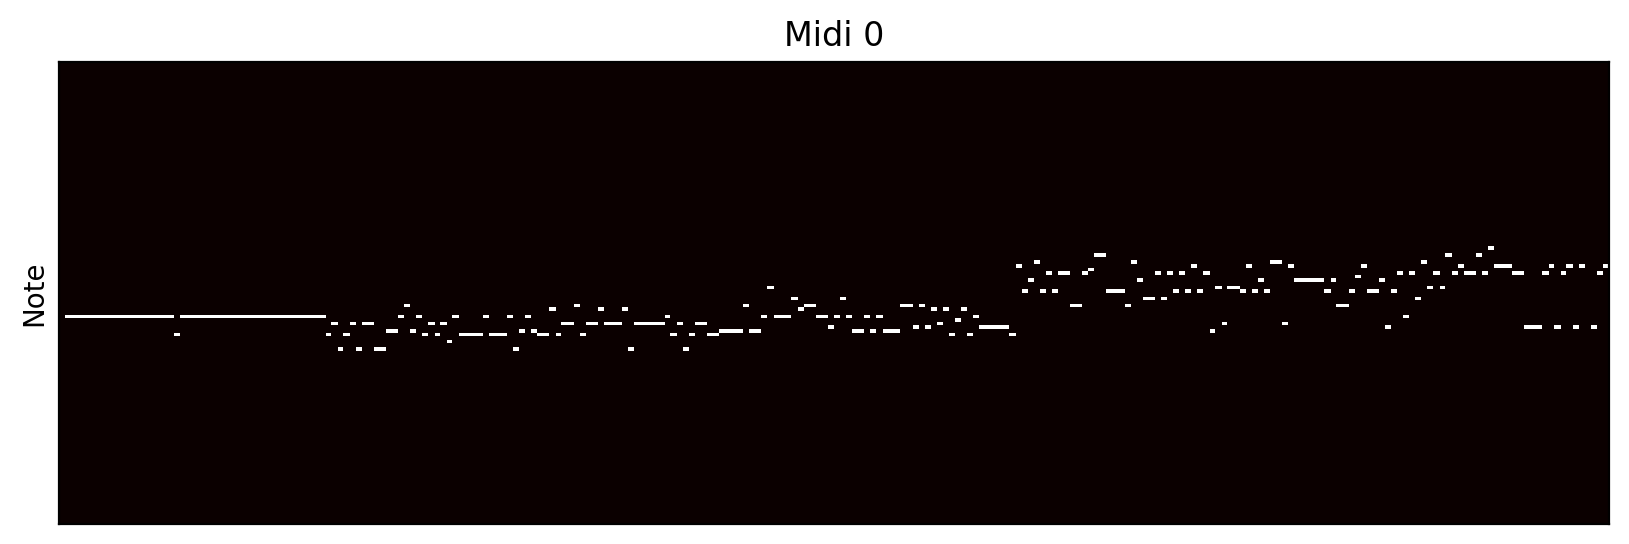

In [ ]:
if not os.path.exists('midi'):
    os.makedirs('midi')

x_hat_np = x_hat.detach().numpy()#.cpu()
x_hat_np.shape
for i, seq in enumerate(x_hat_np):
    row_maxes = seq.max(axis=1).reshape(-1, 1)
    midi_out = np.where(seq == row_maxes, 1, 0)

    if np.all(midi_out[:,-1]):
        print("Midi: {} is all silent".format(i))
        continue

    np.savetxt("midi/csv_midi_out_{}.csv".format(i), midi_out, delimiter=";")

    midi = builder.midi_from_piano_roll(midi_out[:,:-1]) # Select all notes but the silent one
    plt.figure(figsize=(10, 3))
    plt.title("Midi {}".format(i))

    builder.plot_midi(midi)
    plt.savefig("midi/img_midi_{}.png".format(i))

    midi.write('midi/{}.mid'.format(i))

    #synth, rate = builder.play_midi(midi)
    #Audio(synth, rate=rate)

In [ ]:
# LSmodel.eval()
# with torch.no_grad():
#   genres=["jazz","smooth"]
#   moods=["calm", "relaxing"]
#   LSin=getEC(getUC(genres,moods))
#   LSin=torch.tensor(LSin, dtype=torch.float32)
#   out=LSmodel(LSin)

In [ ]:
out=predicted_er
print(out.shape)

torch.Size([1, 500, 64])


In [ ]:
gen_batch = 1
z_gen = out

# Sample from latent space
h_gen,c_gen,hconductor_gen,cconductor_gen = net.init_hidden(gen_batch)
conductor_hidden_gen = (hconductor_gen,cconductor_gen)


notes_gen = torch.zeros(gen_batch,TOTAL_NOTES,NUM_PITCHES,device=device)

# For the first timestep the note is the embedding
note_gen = torch.zeros(gen_batch, 1 , NUM_PITCHES,device=device)


# Initialize decoder_hidden_gen with correct dimensions
# decoder_hidden_gen = (torch.randn(1,gen_batch, decoders_initial_size,device=device), torch.randn(1,gen_batch, decoders_initial_size,device=device))
# The decoder LSTM has n_layers_decoder=3 and decoders_hidden_size=128
decoder_hidden_gen = (torch.randn(net.decoder.num_layers, gen_batch, net.decoder.hidden_size, device=device),
                      torch.randn(net.decoder.num_layers, gen_batch, net.decoder.hidden_size, device=device))


counter=0

print(sequence_length)
print(notes_gen.shape)
for i in range(totalbars):
    # Reset decoder hidden state for each bar with correct dimensions
    # decoder_hidden_gen = (torch.randn(1,gen_batch, decoders_initial_size,device=device), torch.randn(1,gen_batch, decoders_initial_size,device=device))
    decoder_hidden_gen = (torch.randn(net.decoder.num_layers, gen_batch, net.decoder.hidden_size, device=device),
                          torch.randn(net.decoder.num_layers, gen_batch, net.decoder.hidden_size, device=device))
    embedding_gen, conductor_hidden_gen = net.conductor(z_gen[:,i,:].view(gen_batch,1, -1), conductor_hidden_gen)

    for _ in range(sequence_length):
        # Concat embedding with previous note

        e_gen = torch.cat([embedding_gen, note_gen], dim=-1)
        e_gen = e_gen.view(gen_batch, 1, -1)

        # Generate a single note (for each batch)
        note_gen, decoder_hidden_gen = net.decoder(e_gen, decoder_hidden_gen)

        aux_gen = net.linear(note_gen)

        aux_gen=torch.softmax(aux_gen, dim=2);
        #notes_gen[:,range(i*16,i*16+16),:]=aux_gen;
        notes_gen[:,counter,:]=aux_gen.squeeze();

        note_gen=aux_gen
        counter = counter+1

print(notes_gen)

16
torch.Size([1, 256, 61])
tensor([[[1.6003e-02, 6.3345e-04, 7.3066e-03,  ..., 1.6062e-06,
          2.4850e-07, 8.6836e-01],
         [4.1915e-03, 1.7141e-04, 2.4149e-03,  ..., 5.4459e-07,
          2.5267e-07, 9.4401e-01],
         [7.0566e-03, 4.7892e-04, 6.1138e-03,  ..., 9.1289e-07,
          1.5649e-06, 9.2445e-01],
         ...,
         [1.3694e-04, 8.7513e-07, 6.2036e-05,  ..., 1.7416e-09,
          2.2557e-09, 9.9906e-01],
         [1.6018e-04, 1.0078e-06, 8.7161e-05,  ..., 2.4390e-09,
          3.4343e-09, 9.9886e-01],
         [1.1375e-04, 7.0410e-07, 5.4095e-05,  ..., 1.3907e-09,
          1.9345e-09, 9.9918e-01]]], grad_fn=<CopySlices>)


In [ ]:
notes_np = (notes_gen).cpu().detach().numpy()
notes_np.shape
for i, seq in enumerate(notes_np):
    row_maxes = seq.max(axis=1).reshape(-1, 1)
    midi_out = np.where(seq == row_maxes, 1, 0)
    if np.all(midi_out[:,-1]):
        print("Midi: {} is all silent".format(i))
        continue

    np.savetxt("midi/gen_csv_midi_out_{}.csv".format(i), midi_out, delimiter=";")

    midi = builder.midi_from_piano_roll(midi_out[:,:-1]) # Select all notes but the silent one
    plt.figure(figsize=(10, 3))
    plt.title("Gen Midi {}".format(i))

    builder.plot_midi(midi)
    plt.savefig("midi/gen_img_midi_{}.png".format(i))

    midi.write('midi/gen_{}.mid'.format(i))

Midi: 0 is all silent


In [ ]:
!python3

Python 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> ^C


In [ ]:
!pip install midi-player
!pip install jchord

In [ ]:
!python3 "beautify_music.py" "midi/gen_0.mid" "midi/gen_0.mid"

Generated new song structure saved to midi/gen_0.mid


In [ ]:
!python3 "extend.py" "midi/gen_0.mid" "midi/gen_0.mid"

In [ ]:
from midi_player import MIDIPlayer

# For a local file
MIDIPlayer('midi/gen_0.mid', 400)


# Unit 8: aka Inference Cell

In [ ]:
test_ec = getEC(getUC(["classical","electronic"],["melodic","happy","cheerful"]))

torch.Size([1, 500, 64])
16
torch.Size([1, 256, 61])


/content/src/midi_builder.py:64: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  display.specshow(midi_sample.get_piano_roll(), y_axis='cqt_note', cmap=plt.cm.hot)


Generated new song structure saved to midi/gen_0.mid


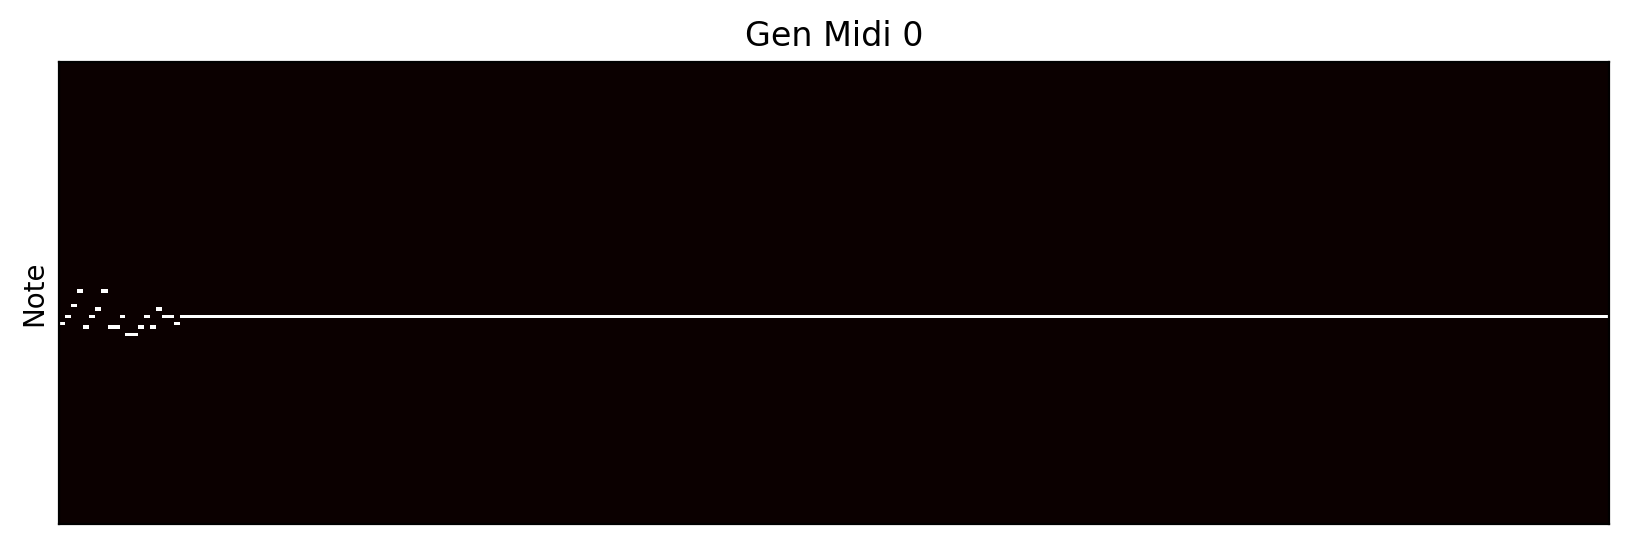

In [ ]:

tensor = torch.from_numpy(test_ec).to(device)
tensor = tensor.unsqueeze(0)
out=predicted_er
print(out.shape)
gen_batch = 1
z_gen = out

# Sample from latent space
h_gen,c_gen,hconductor_gen,cconductor_gen = net.init_hidden(gen_batch)
conductor_hidden_gen = (hconductor_gen,cconductor_gen)


notes_gen = torch.zeros(gen_batch,TOTAL_NOTES,NUM_PITCHES,device=device)

# For the first timestep the note is the embedding
note_gen = torch.zeros(gen_batch, 1 , NUM_PITCHES,device=device)


# Initialize decoder_hidden_gen with correct dimensions
# decoder_hidden_gen = (torch.randn(1,gen_batch, decoders_initial_size,device=device), torch.randn(1,gen_batch, decoders_initial_size,device=device))
# The decoder LSTM has n_layers_decoder=3 and decoders_hidden_size=128
decoder_hidden_gen = (torch.randn(net.decoder.num_layers, gen_batch, net.decoder.hidden_size, device=device),
                      torch.randn(net.decoder.num_layers, gen_batch, net.decoder.hidden_size, device=device))


counter=0

print(sequence_length)
print(notes_gen.shape)
for i in range(totalbars):
    # Reset decoder hidden state for each bar with correct dimensions
    # decoder_hidden_gen = (torch.randn(1,gen_batch, decoders_initial_size,device=device), torch.randn(1,gen_batch, decoders_initial_size,device=device))
    decoder_hidden_gen = (torch.randn(net.decoder.num_layers, gen_batch, net.decoder.hidden_size, device=device),
                          torch.randn(net.decoder.num_layers, gen_batch, net.decoder.hidden_size, device=device))
    embedding_gen, conductor_hidden_gen = net.conductor(z_gen[:,i,:].view(gen_batch,1, -1), conductor_hidden_gen)

    for _ in range(sequence_length):
        # Concat embedding with previous note

        e_gen = torch.cat([embedding_gen, note_gen], dim=-1)
        e_gen = e_gen.view(gen_batch, 1, -1)

        # Generate a single note (for each batch)
        note_gen, decoder_hidden_gen = net.decoder(e_gen, decoder_hidden_gen)

        aux_gen = net.linear(note_gen)

        aux_gen=torch.softmax(aux_gen, dim=2);
        #notes_gen[:,range(i*16,i*16+16),:]=aux_gen;
        notes_gen[:,counter,:]=aux_gen.squeeze();

        note_gen=aux_gen
        counter = counter+1

#print(notes_gen)
notes_np = (notes_gen).cpu().detach().numpy()
notes_np.shape
for i, seq in enumerate(notes_np):
    row_maxes = seq.max(axis=1).reshape(-1, 1)
    midi_out = np.where(seq == row_maxes, 1, 0)
    if np.all(midi_out[:,-1]):
        print("Midi: {} is all silent".format(i))
        continue

    np.savetxt("midi/gen_csv_midi_out_{}.csv".format(i), midi_out, delimiter=";")

    midi = builder.midi_from_piano_roll(midi_out[:,:-1]) # Select all notes but the silent one
    plt.figure(figsize=(10, 3))
    plt.title("Gen Midi {}".format(i))

    builder.plot_midi(midi)
    plt.savefig("midi/gen_img_midi_{}.png".format(i))

    midi.write('midi/gen_{}.mid'.format(i))
!python3 "beautify_music.py" "midi/gen_0.mid" "midi/gen_0.mid"
!python3 "extend.py" "midi/gen_0.mid" "midi/gen_0.mid"
from midi_player import MIDIPlayer





In [ ]:
# !python3 "instrument_changer.py"

In [ ]:
MIDIPlayer('midi/0.mid', 400)

In [ ]:
MIDIPlayer('midi/gen_0.mid', 400)